In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
sc.stop()
from pyspark import SparkConf, SparkContext
from pyspark.streaming.kafka import KafkaUtils
from pyspark.streaming import StreamingContext
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import time
from IPython import display


In [4]:
conf = SparkConf().setMaster("local[2]").setAppName("StreamAnalyzer")
sc = SparkContext(conf=conf)
sqlContext = SQLContext(sc)
ssc = StreamingContext(sc, 5) # Create a streaming context with batch interval of 5 seconds
ssc.checkpoint("checkpoint")

In [5]:
def updateFunction(newValues, runningCount):
    if runningCount is None:
        runningCount = 0
    return sum(newValues, runningCount)  #add the new values with the previous running count to get the new count

kstream = KafkaUtils.createDirectStream(ssc, topics = ['test'], kafkaParams = {"metadata.broker.list": 'localhost:9092'})
tweets = kstream.map(lambda x: x[1])
wordCounts = tweets.flatMap(lambda tweet: tweet.strip().lower().split(' ')) \
                   .filter(lambda word: '#' in word and len(word) > 1) \
                   .map(lambda word: (word.lower().replace('"', "").replace("'", ""), 1)) \
                   .reduceByKey(lambda a, b : a + b)

runningCountsSinceBeginning = wordCounts.updateStateByKey(updateFunction)
# There is no way to sort a DStream but to sort the underlying RDD. So use transform function
# Also, sort the underlying rdd by value
# RDD does not have a function to take top n rows of rdd and return them as rdd, hence use zipWithIndex technique
sortedHashTags = runningCountsSinceBeginning \
                 .transform(lambda rdd: rdd.sortBy(lambda wordPair: wordPair[1], ascending = False).zipWithIndex().filter(lambda wordFreqPairWithIndex: wordFreqPairWithIndex[1] < 5))
# sortedHashTags.pprint()
counts = []
# you cannot assign inside lambda function, so append to counts list
sortedHashTags.foreachRDD(lambda t, rdd: counts.append(rdd.map(lambda x: x[0]).collect())) # rdd is like (('#fb', 14), 0)


In [6]:
ssc.start()
#ssc.awaitTerminationOrTimeout(30)
#ssc.stop(stopGraceFully=True)

Latest Stats on Hash Tags:  [('#fb', 3), ('#camerafail', 1), ('#...we', 1), ('#gayforpeavy', 1), ('h*#@...will', 1)]


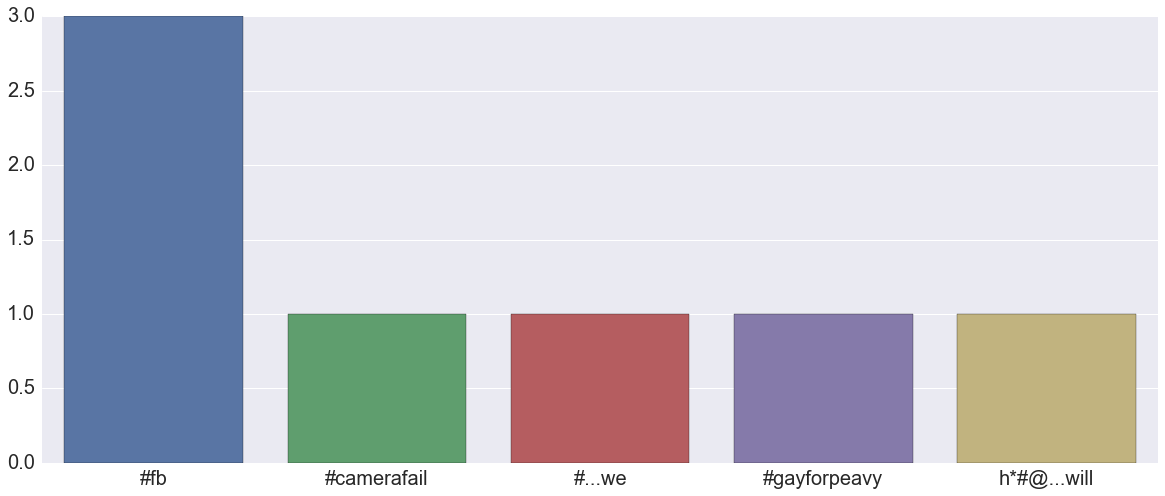

Latest Stats on Hash Tags:  [('#fb', 7), ('#fail', 3), ('#earthquake', 3), ('#italy', 2), ('#itm', 2)]


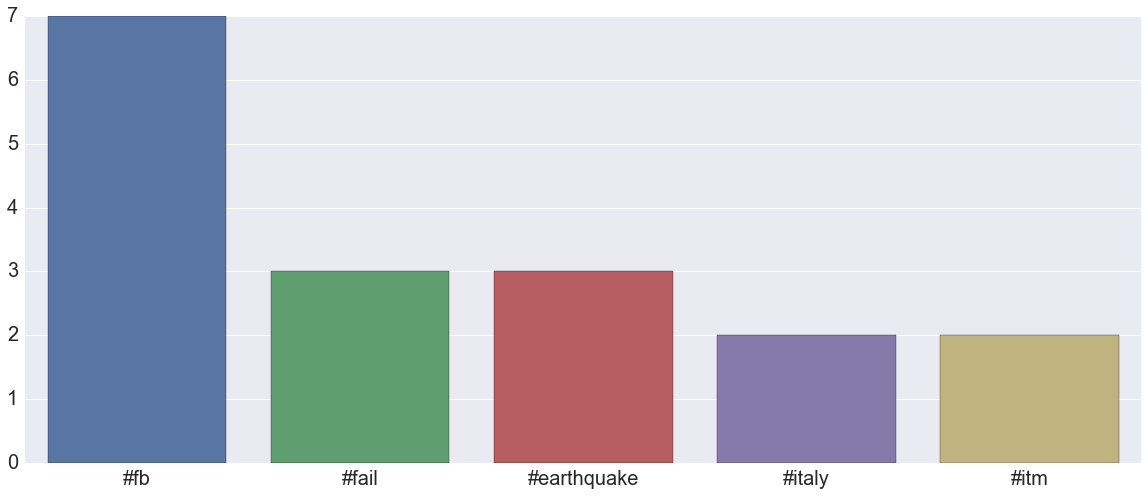

Latest Stats on Hash Tags:  [('#fb', 11), ('#fail', 3), ('#house', 3), ('#earthquake', 3), ('#italy', 2)]


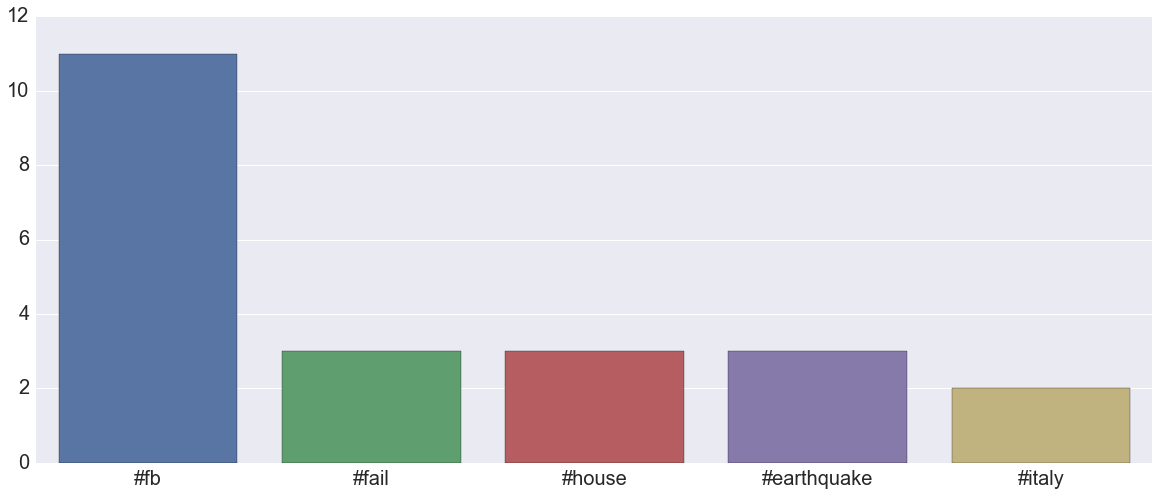

Latest Stats on Hash Tags:  [('#fb', 14), ('#asot400', 5), ('#fail', 3), ('#house', 3), ('#1', 3)]


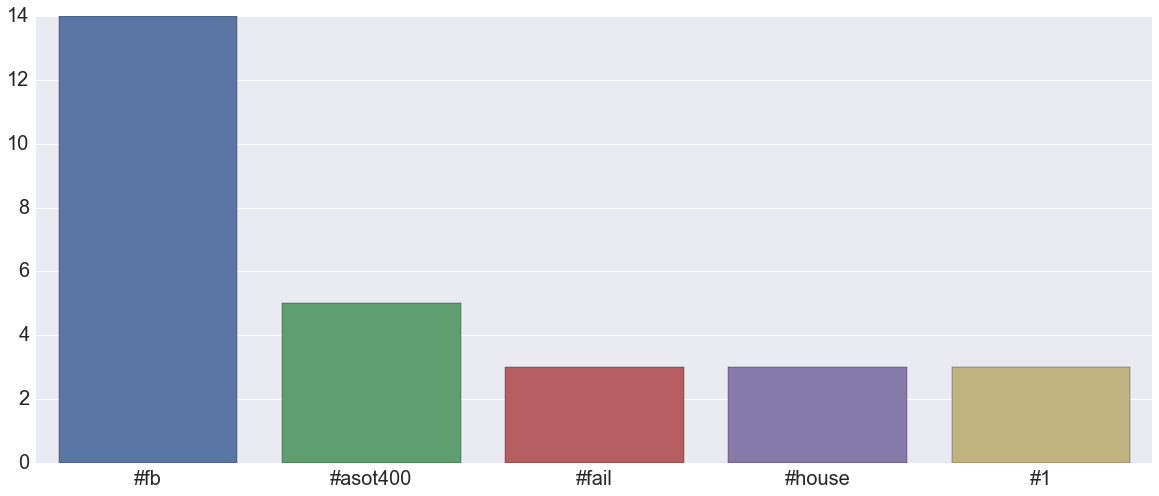

Latest Stats on Hash Tags:  [('#fb', 18), ('#asot400', 9), ('#ipl', 6), ('#1', 4), ('#fail', 3)]


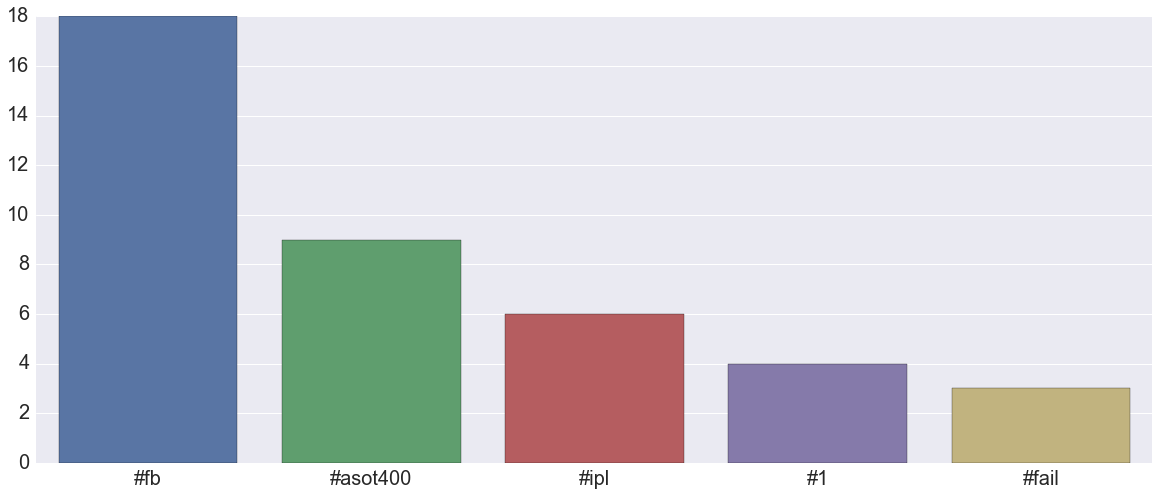

Latest Stats on Hash Tags:  [('#asot400', 50), ('#fb', 21), ('#ipl', 6), ('#1', 4), ('#2', 4)]


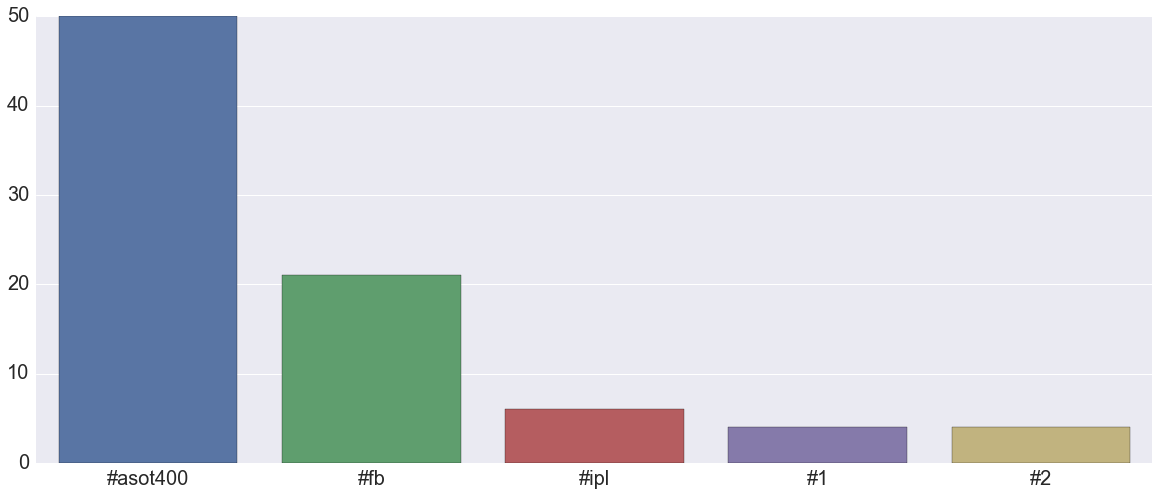

Latest Stats on Hash Tags:  [('#asot400', 68), ('#fb', 23), ('#readathon', 8), ('#1', 6), ('#ipl', 6)]


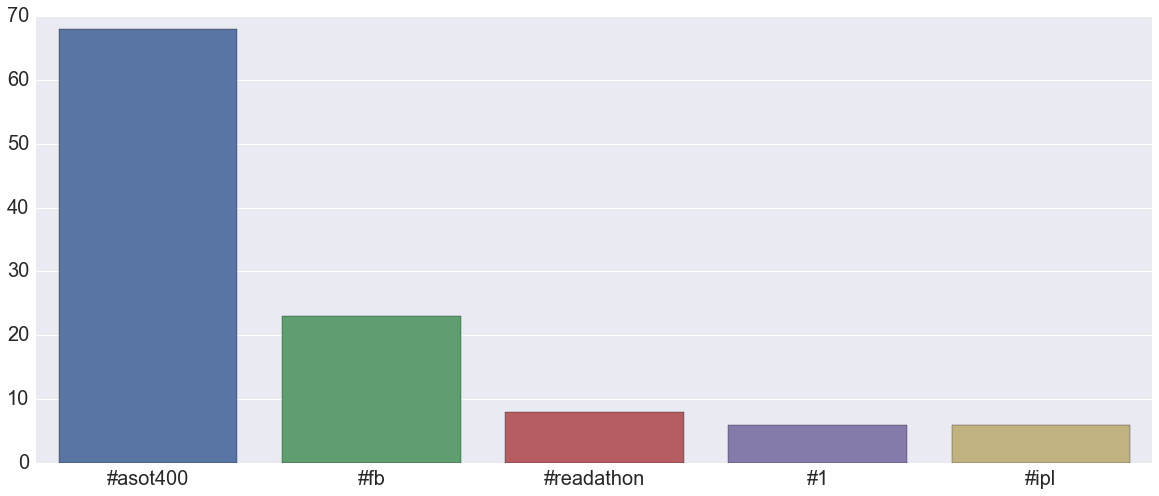

Latest Stats on Hash Tags:  [('#asot400', 91), ('#f1', 26), ('#fb', 23), ('#readathon', 8), ('#1', 7)]


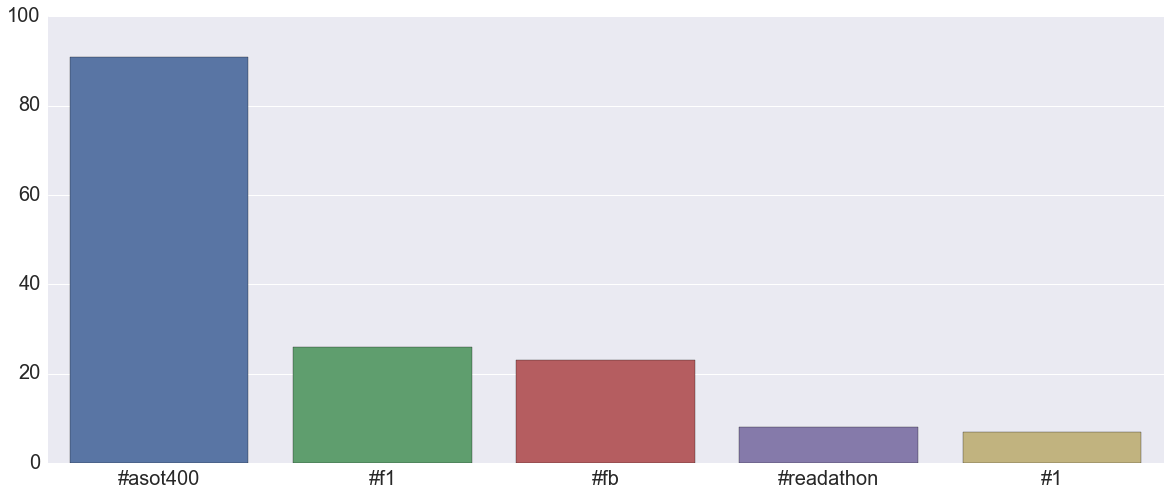

Latest Stats on Hash Tags:  [('#asot400', 130), ('#f1', 29), ('#fb', 24), ('#ipl', 11), ('#pussycatisland', 9)]


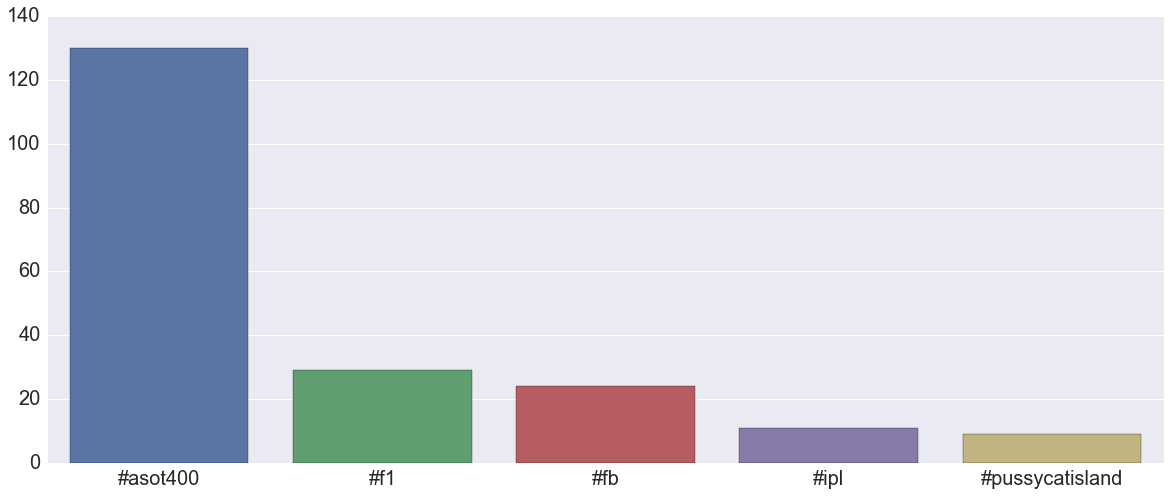

Latest Stats on Hash Tags:  [('#asot400', 130), ('#f1', 29), ('#fb', 25), ('#ipl', 11), ('#pussycatisland', 9)]


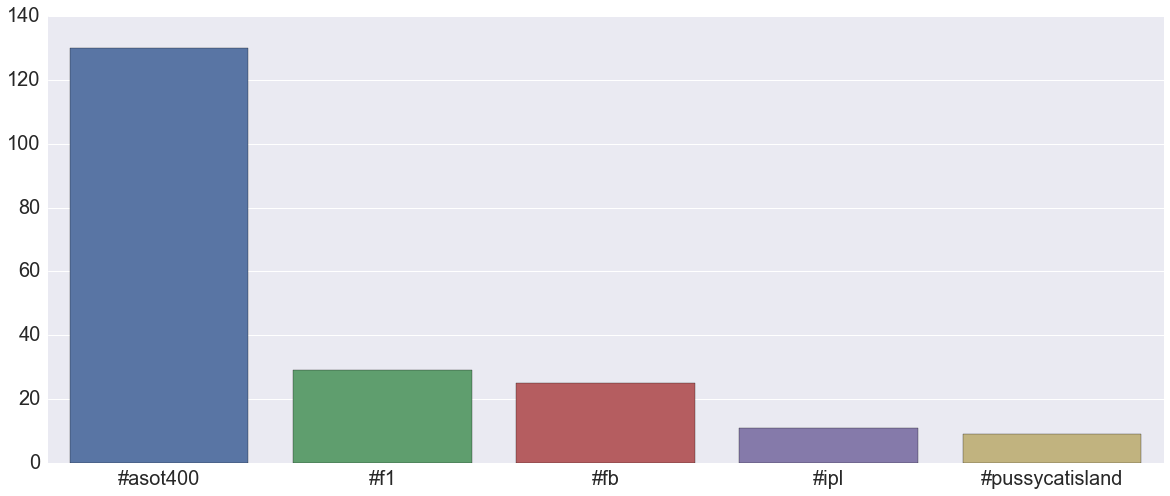

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 29), ('#f1', 29), ('#ipl', 11), ('#fail', 9)]


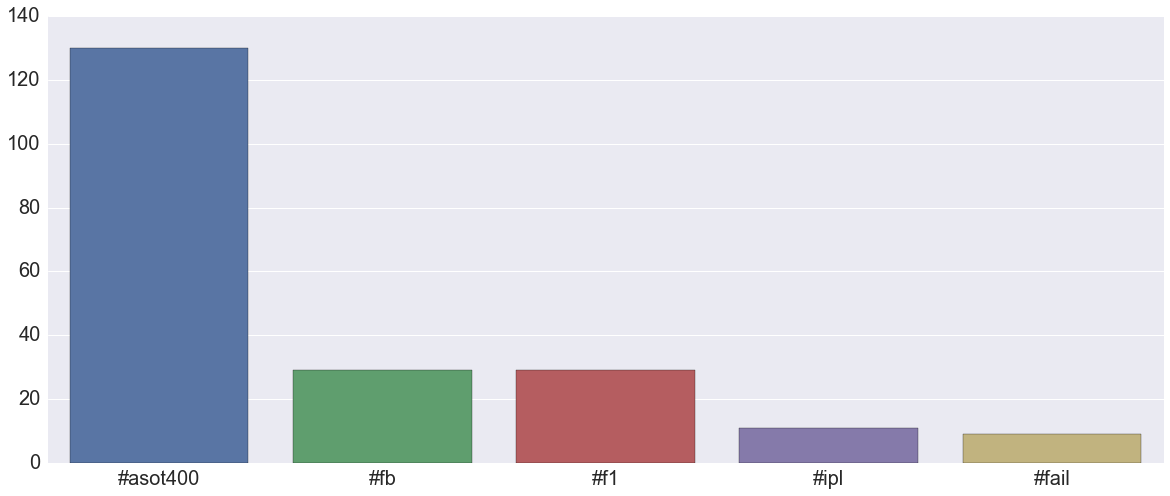

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 33), ('#f1', 29), ('#ipl', 12), ('#fail', 10)]


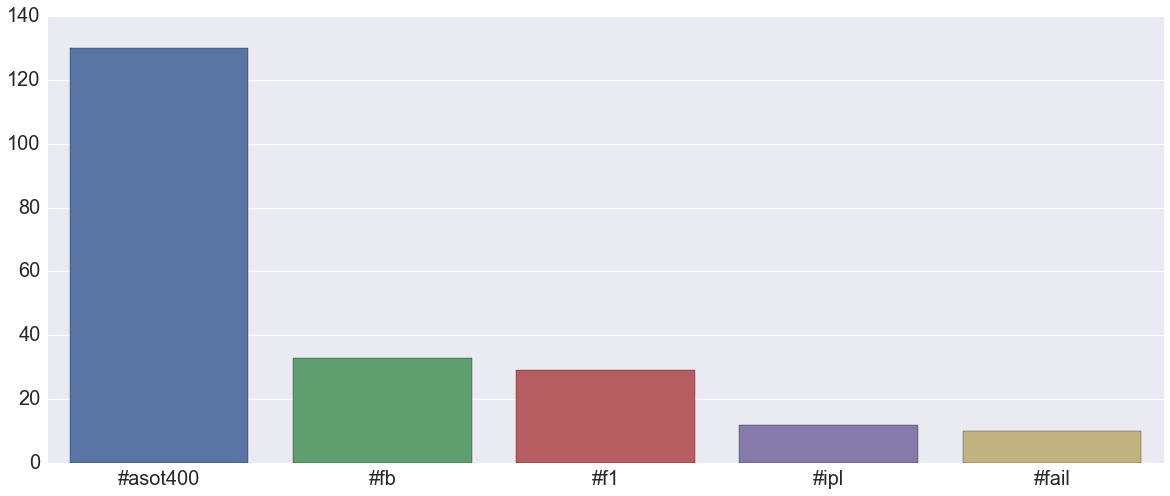

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 34), ('#f1', 29), ('#fail', 15), ('#ipl', 12)]


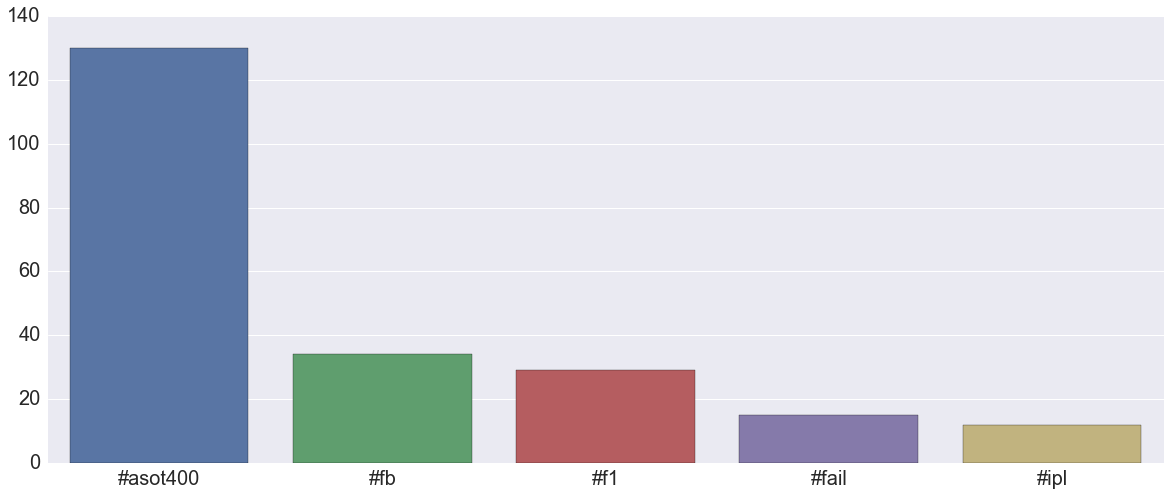

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 36), ('#f1', 29), ('#fail', 16), ('#ipl', 12)]


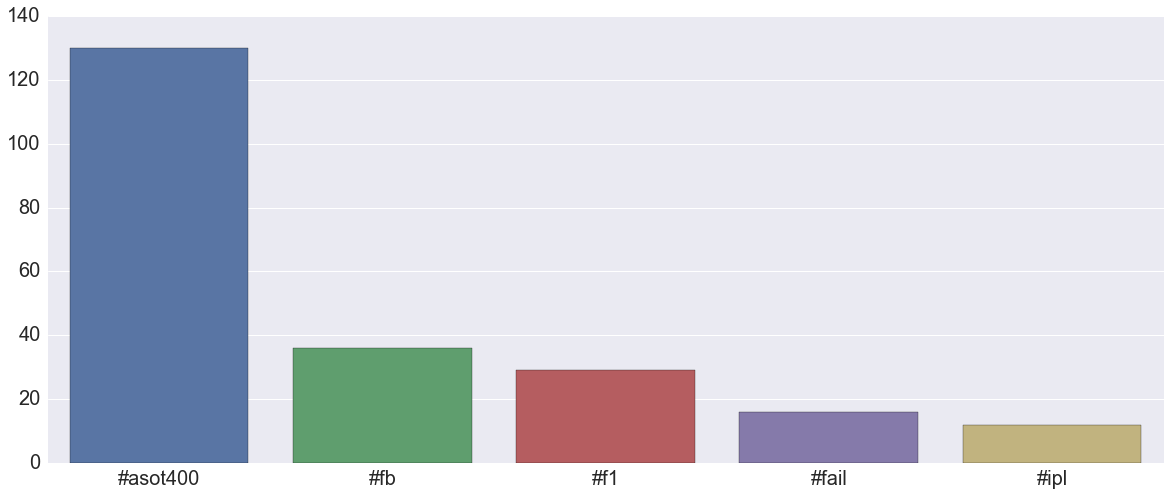

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 37), ('#f1', 29), ('#fail', 16), ('#awaresg', 13)]


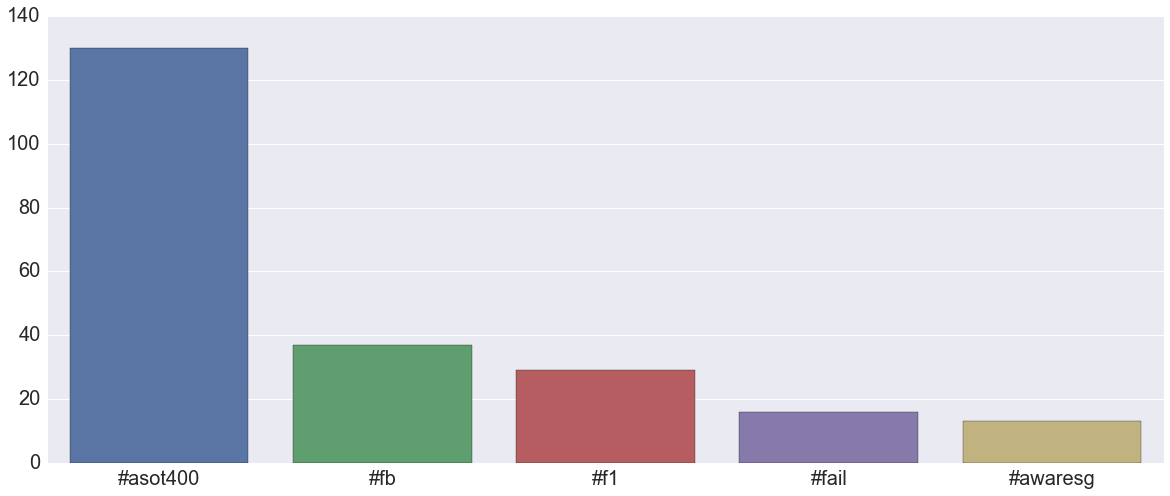

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 38), ('#f1', 29), ('#fail', 16), ('#ipl', 14)]


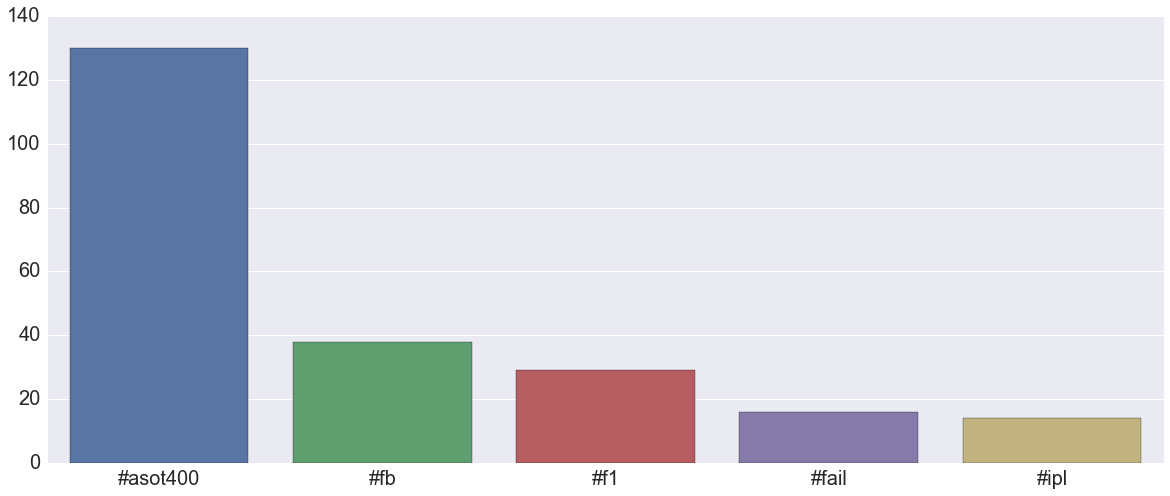

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 41), ('#f1', 29), ('#fail', 16), ('#ipl', 14)]


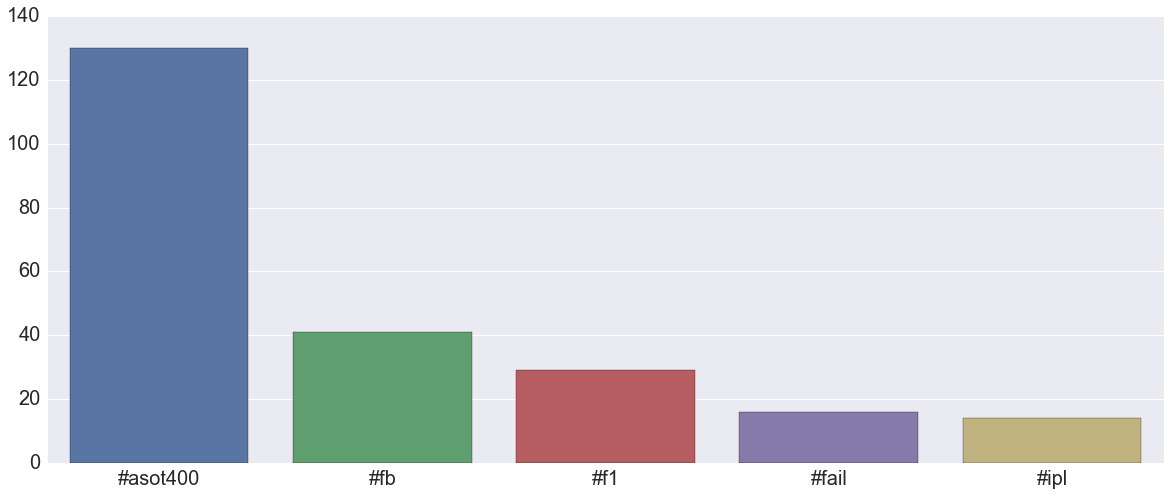

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 44), ('#f1', 29), ('#fail', 16), ('#ipl', 14)]


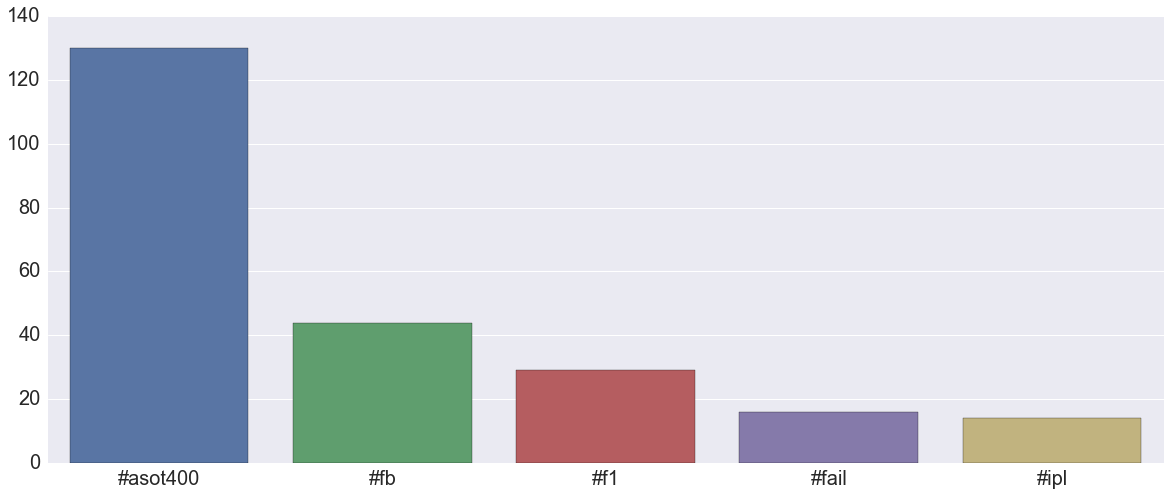

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 47), ('#f1', 29), ('#fail', 18), ('#ipl', 14)]


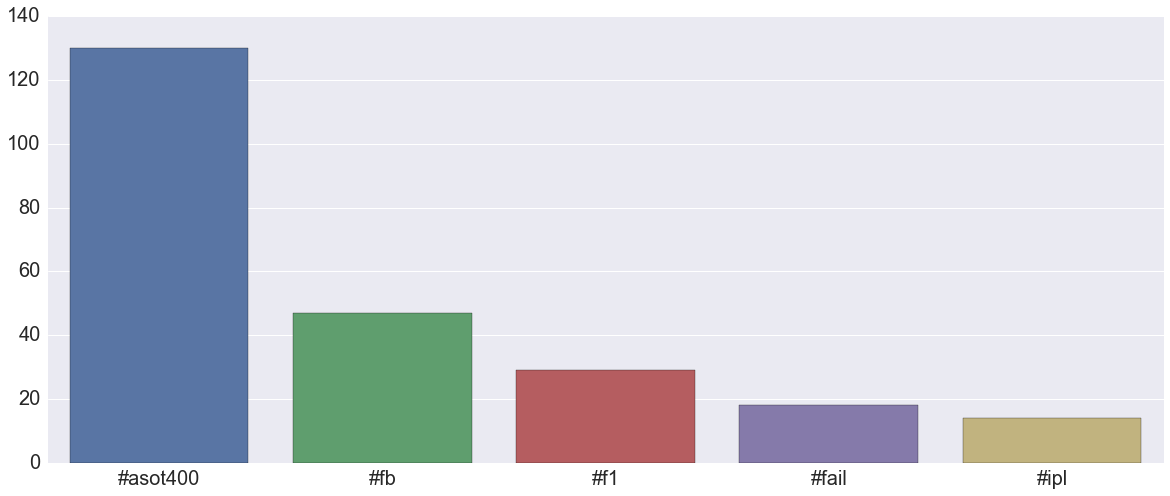

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 50), ('#f1', 29), ('#fail', 18), ('#ipl', 14)]


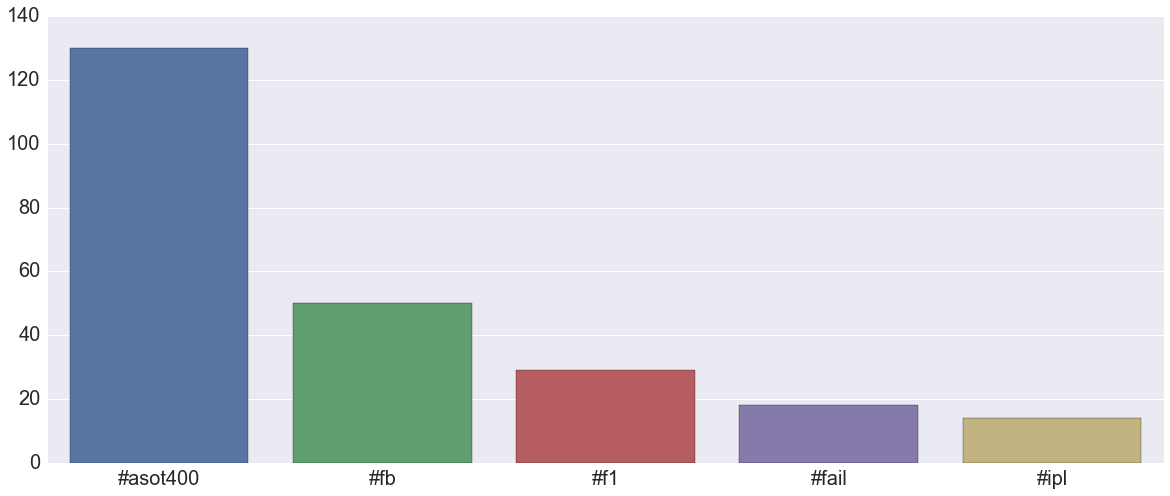

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 56), ('#f1', 29), ('#fail', 19), ('#ipl', 14)]


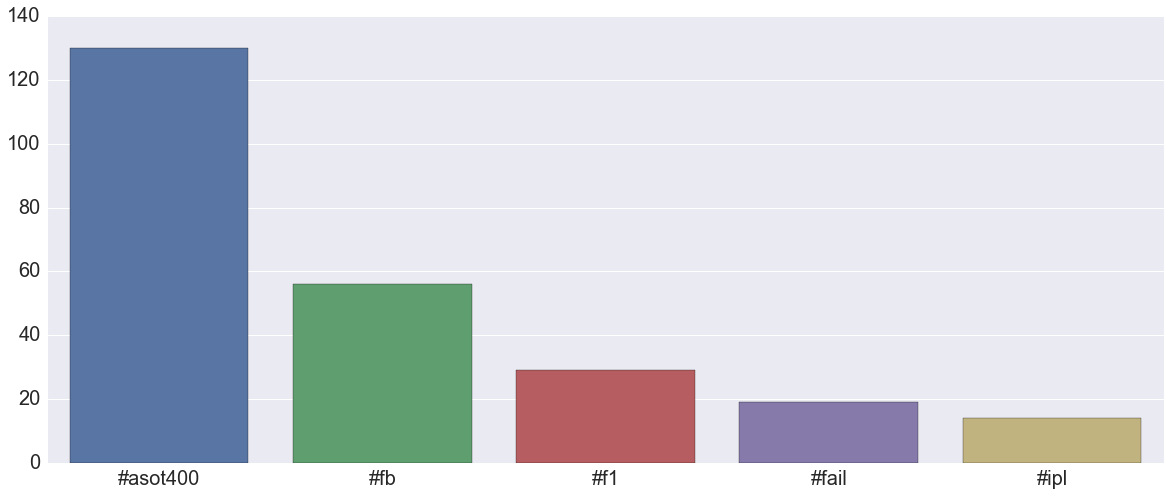

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 63), ('#f1', 29), ('#fail', 22), ('#ipl', 14)]


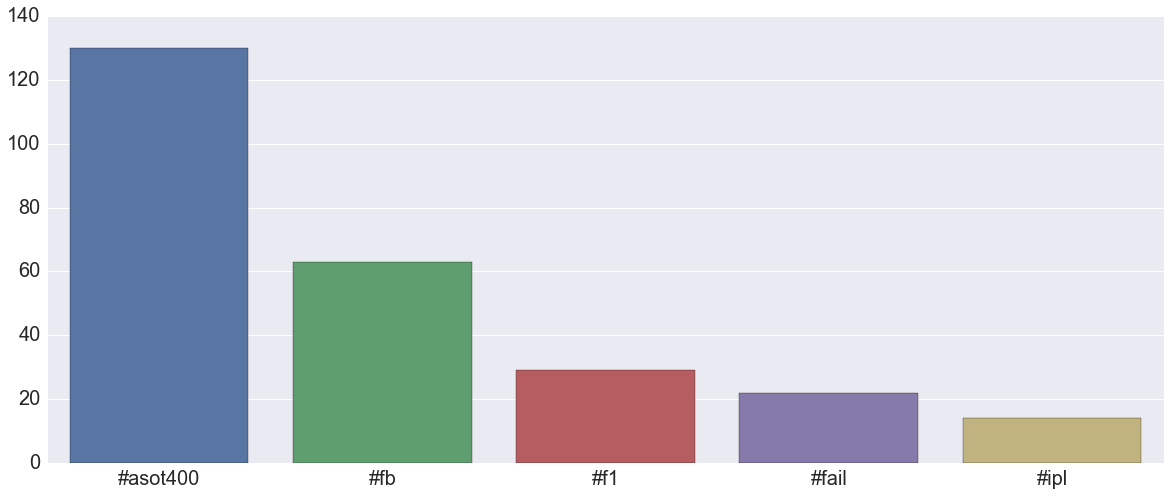

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 69), ('#f1', 29), ('#fail', 24), ('#ipl', 14)]


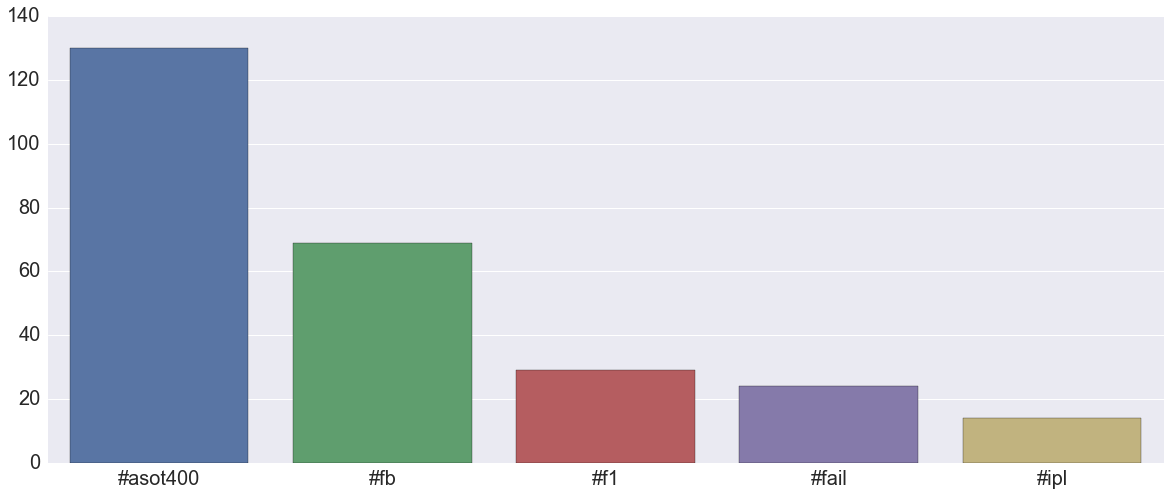

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 75), ('#f1', 30), ('#fail', 24), ('#2', 15)]


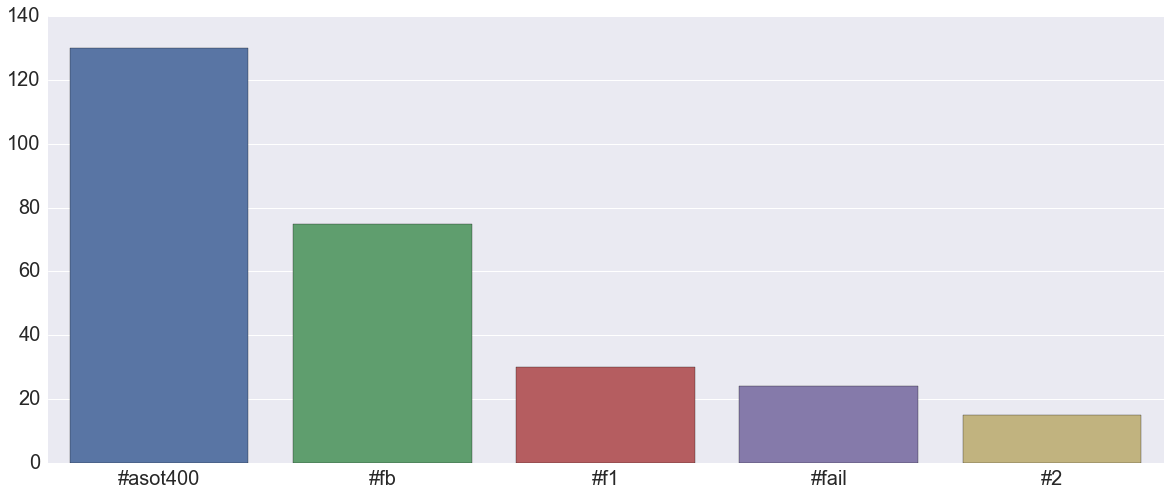

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 79), ('#f1', 44), ('#fail', 24), ('#2', 15)]


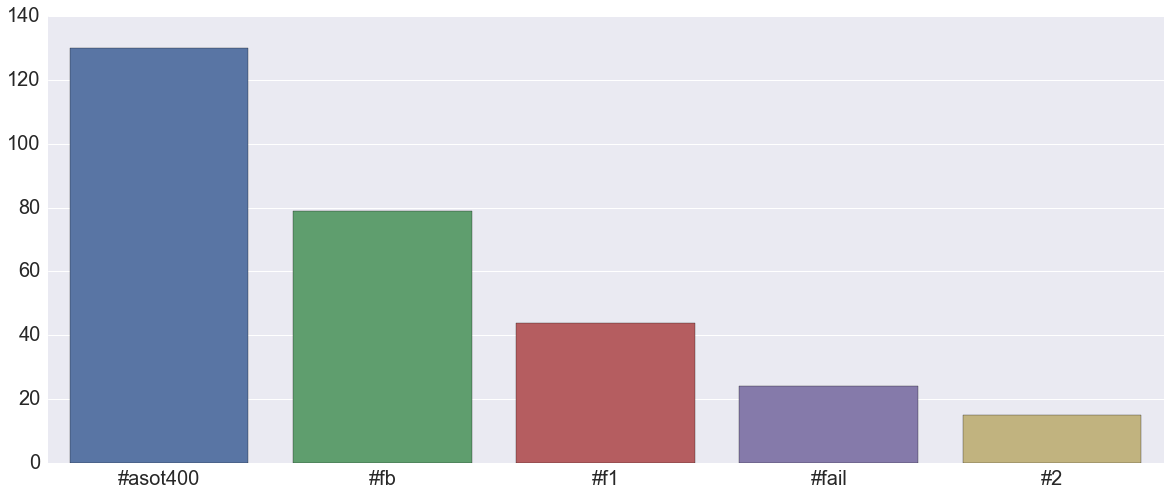

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 83), ('#f1', 45), ('#fail', 24), ('#tag', 22)]


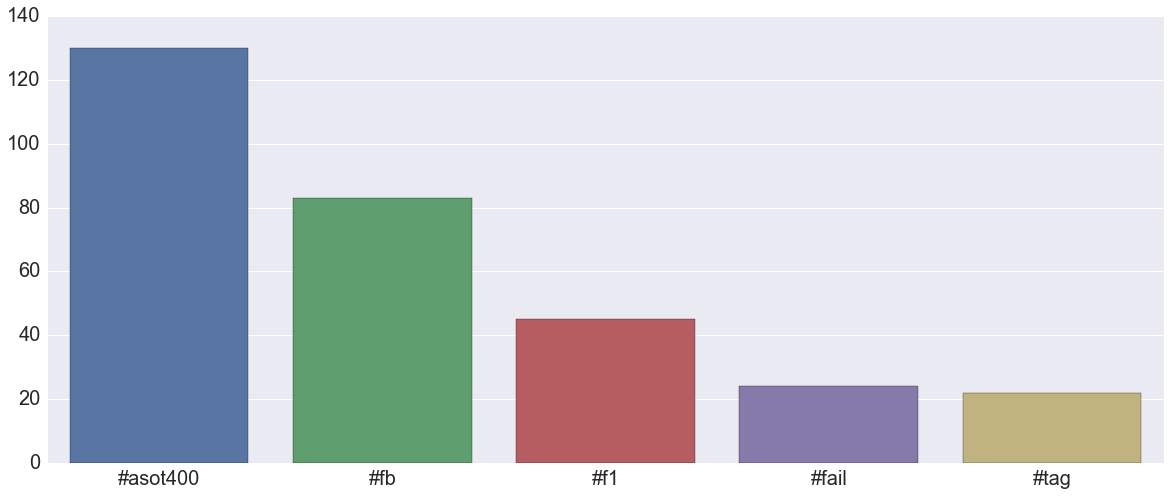

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 87), ('#f1', 45), ('#fail', 24), ('#tag', 22)]


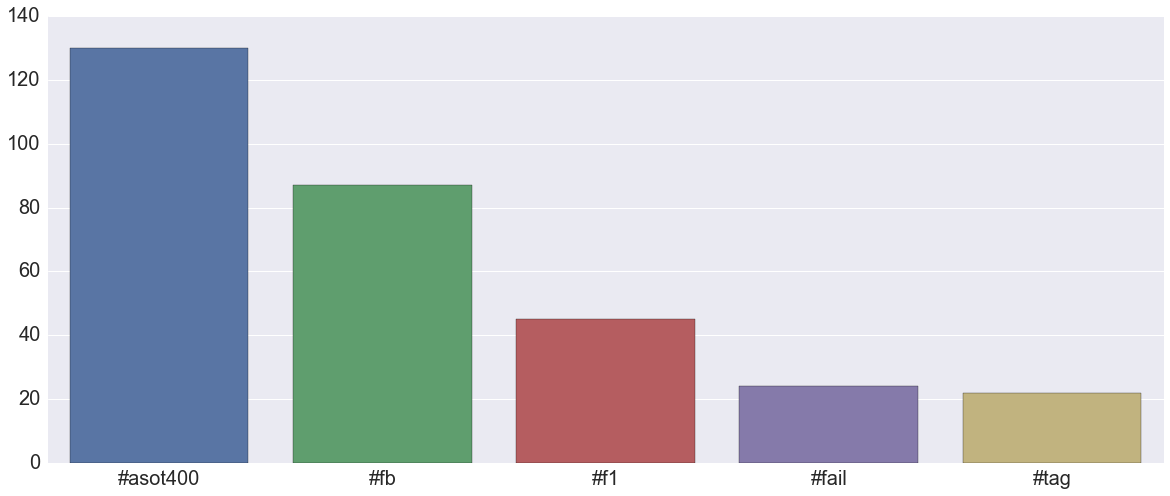

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 94), ('#f1', 45), ('#fail', 29), ('#tag', 22)]


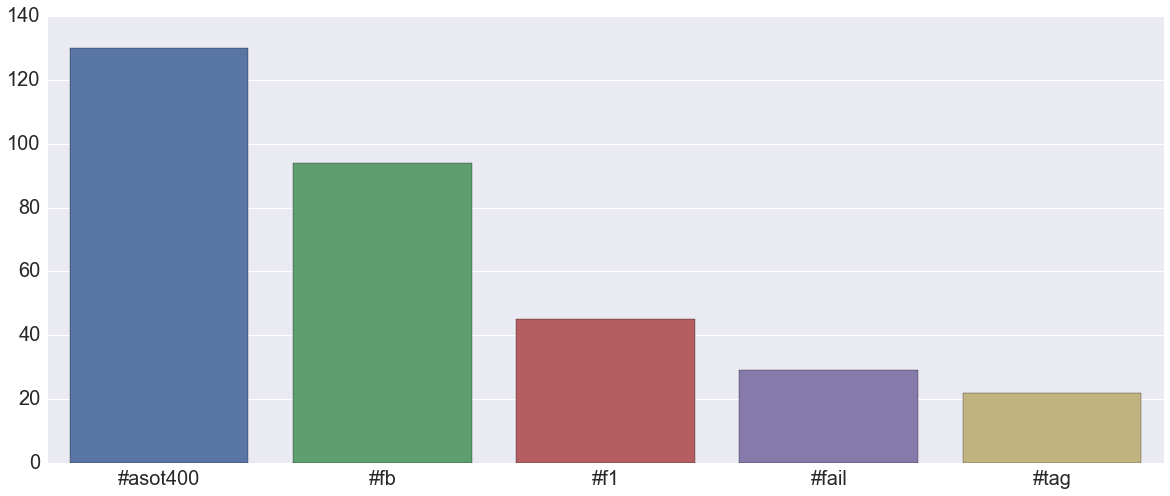

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


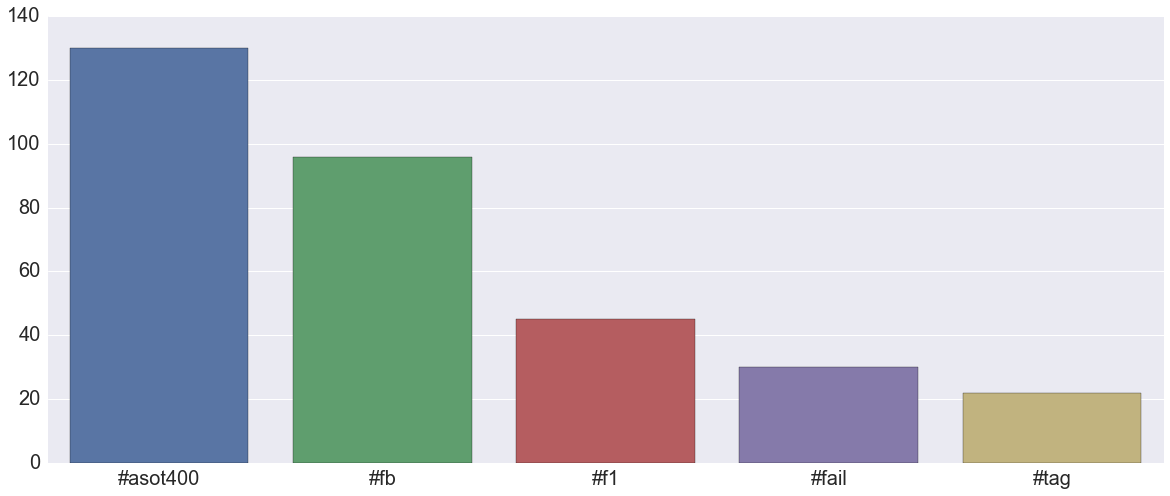

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


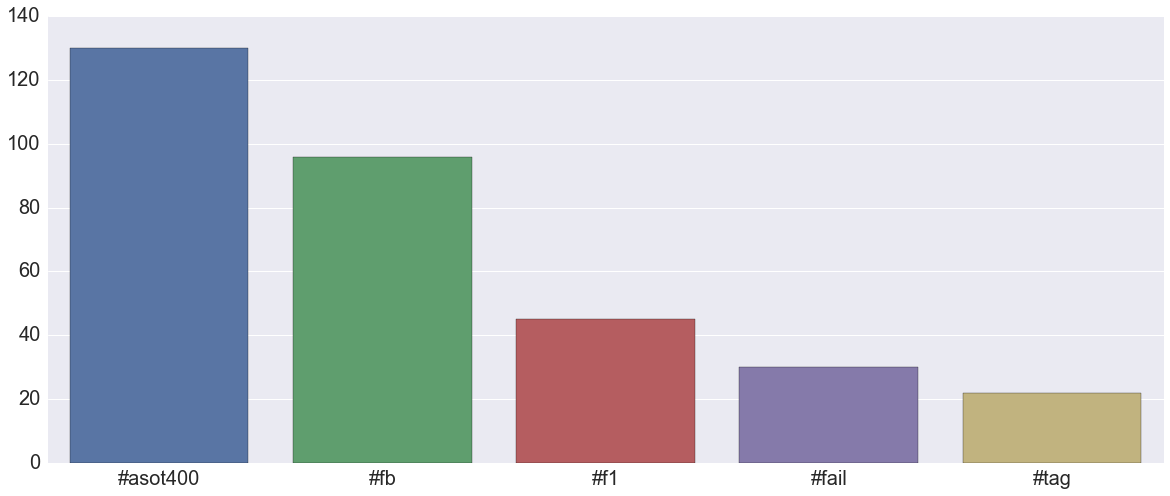

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


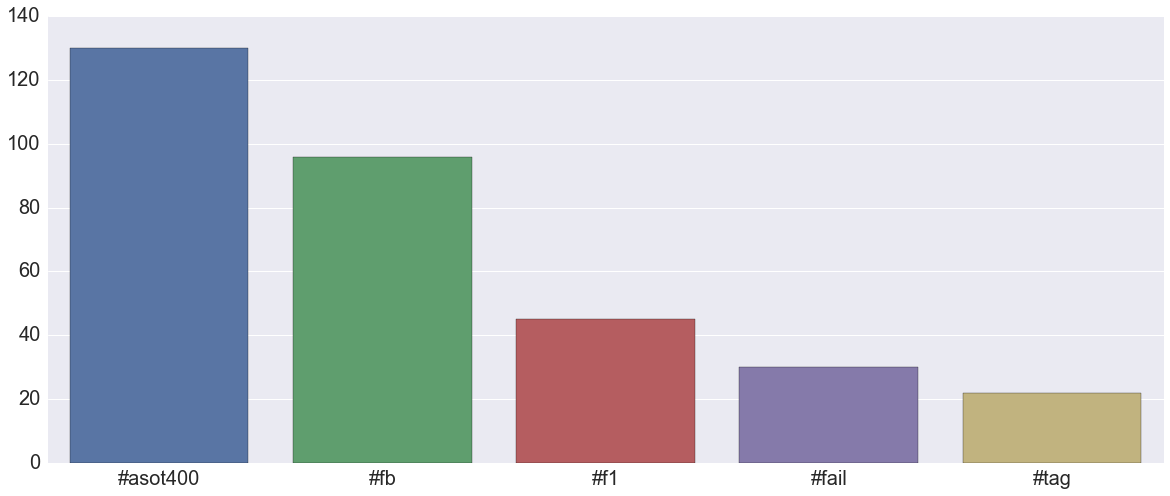

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


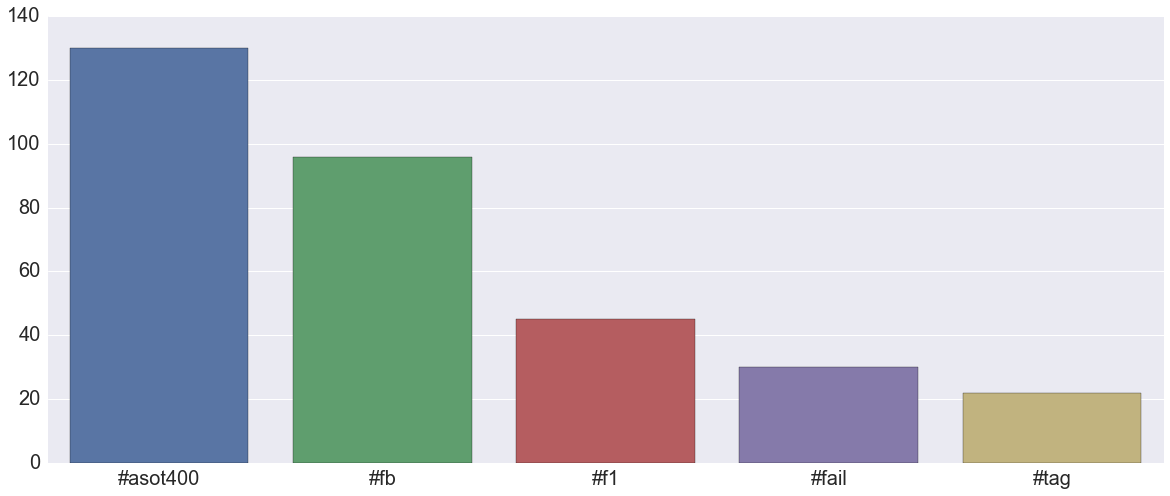

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


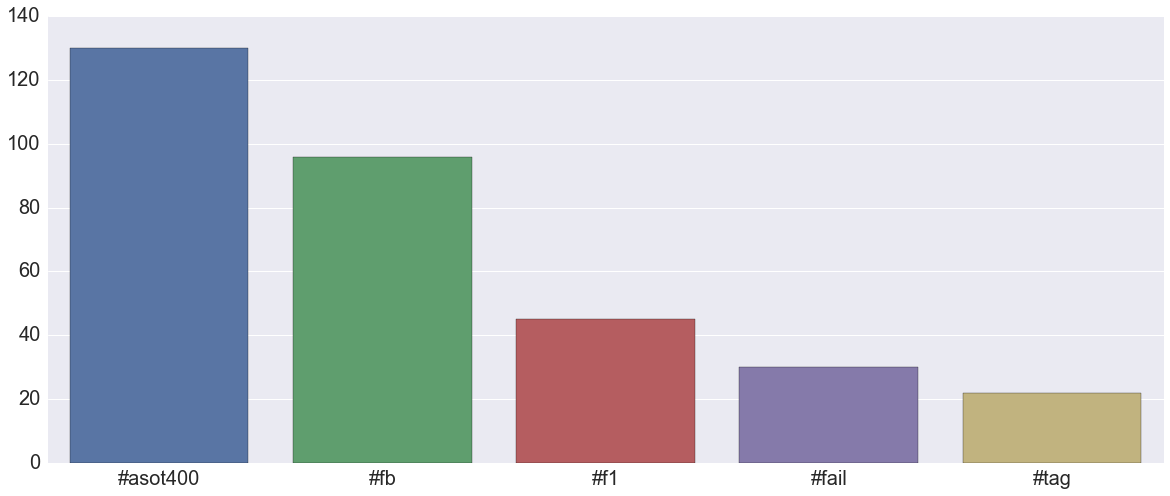

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


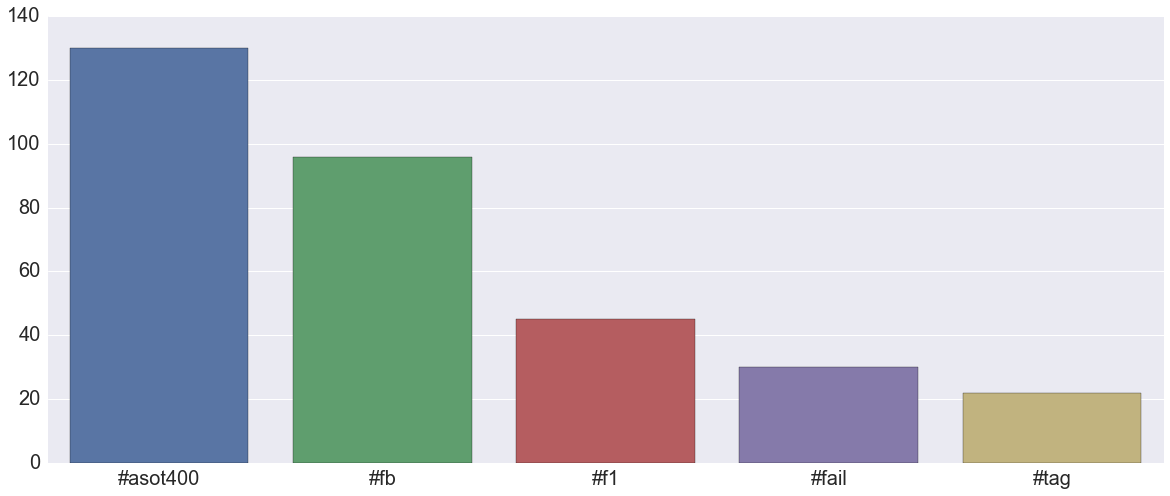

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


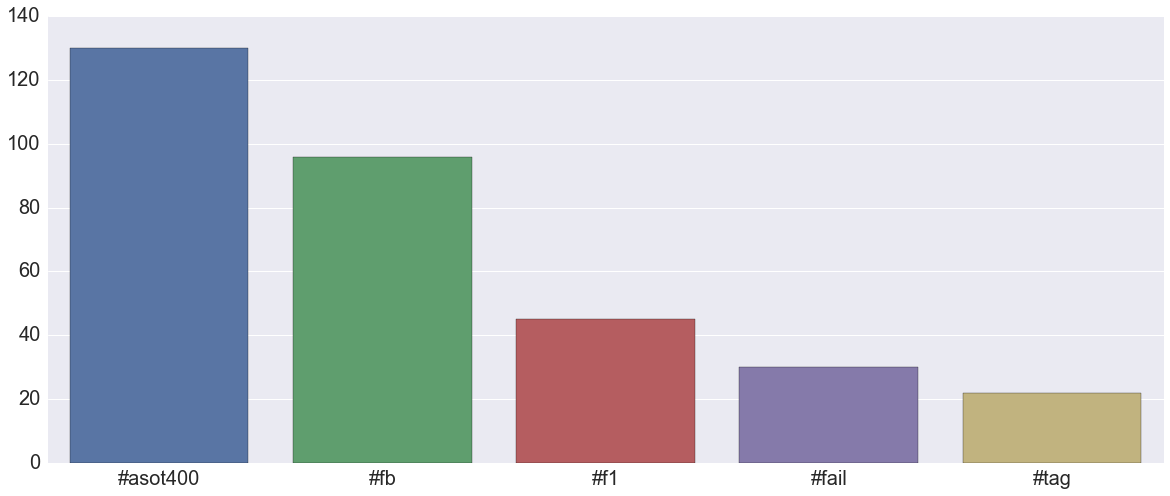

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


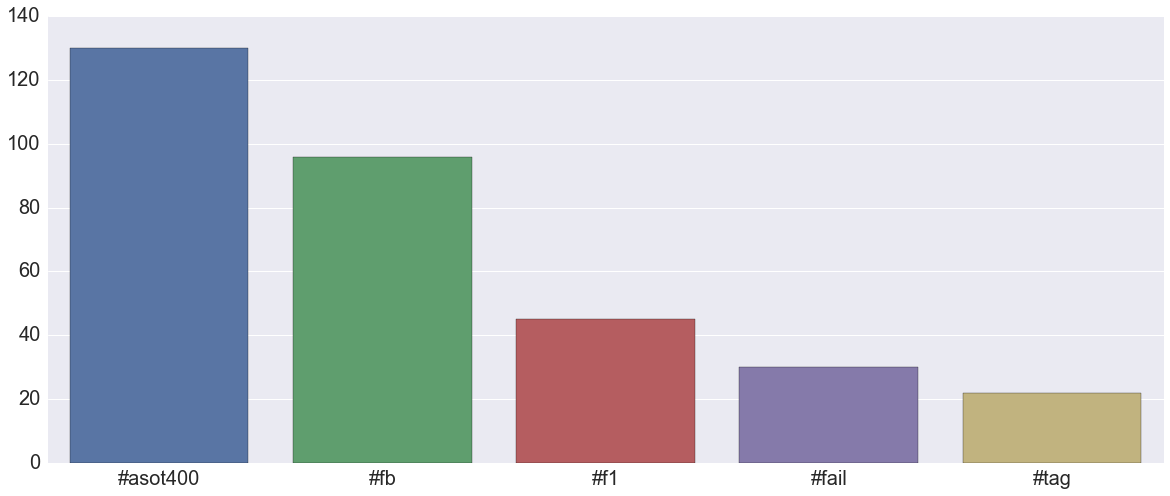

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


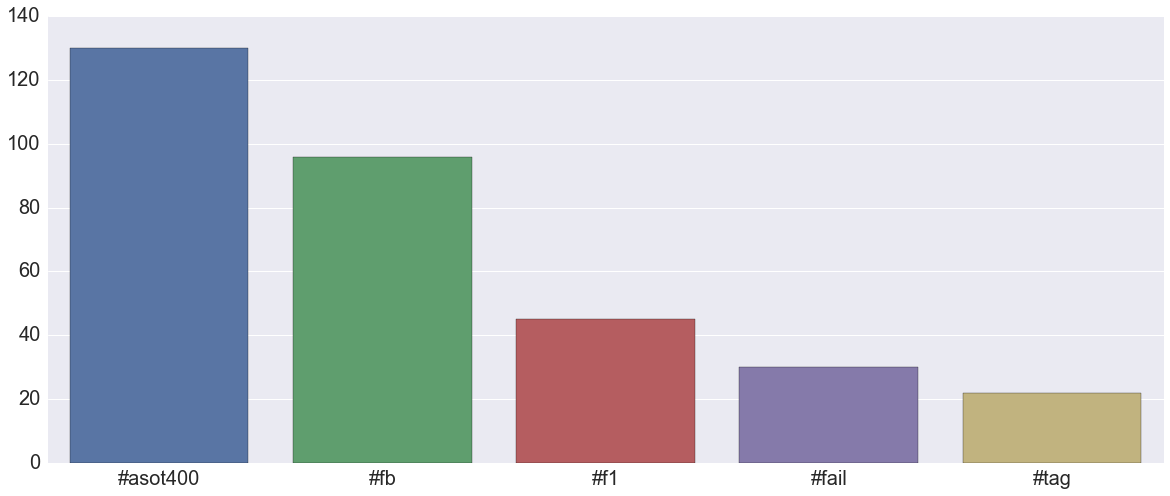

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


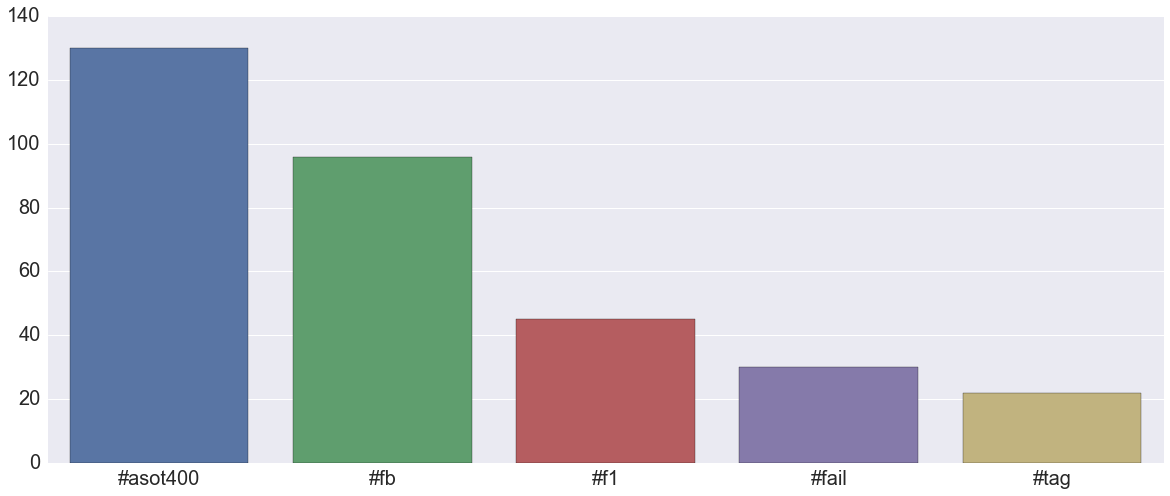

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


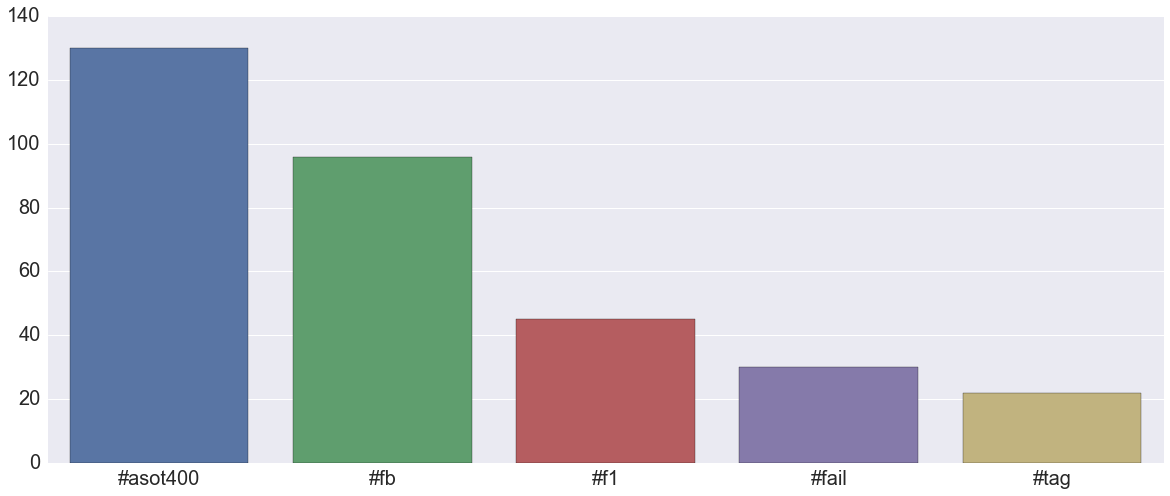

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


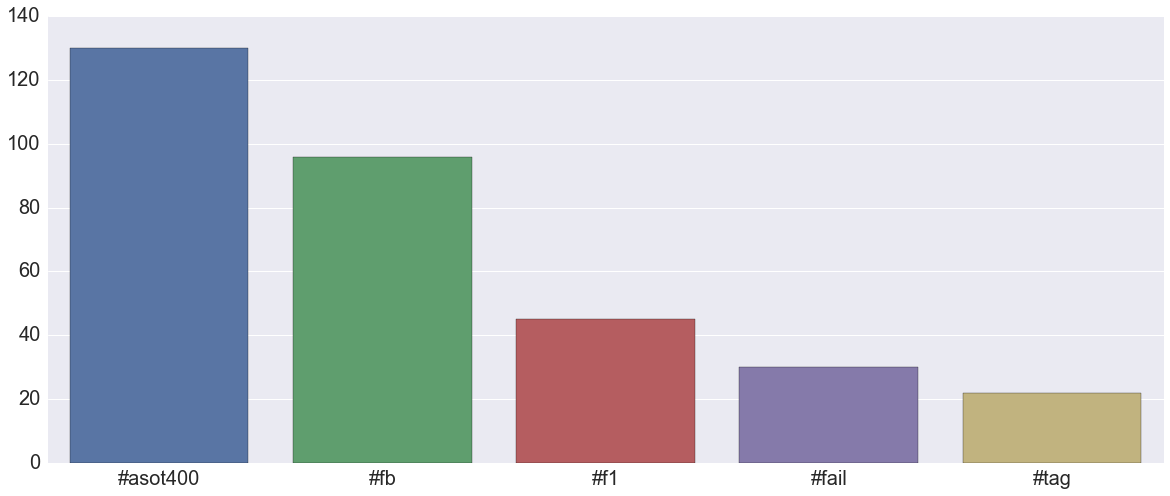

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


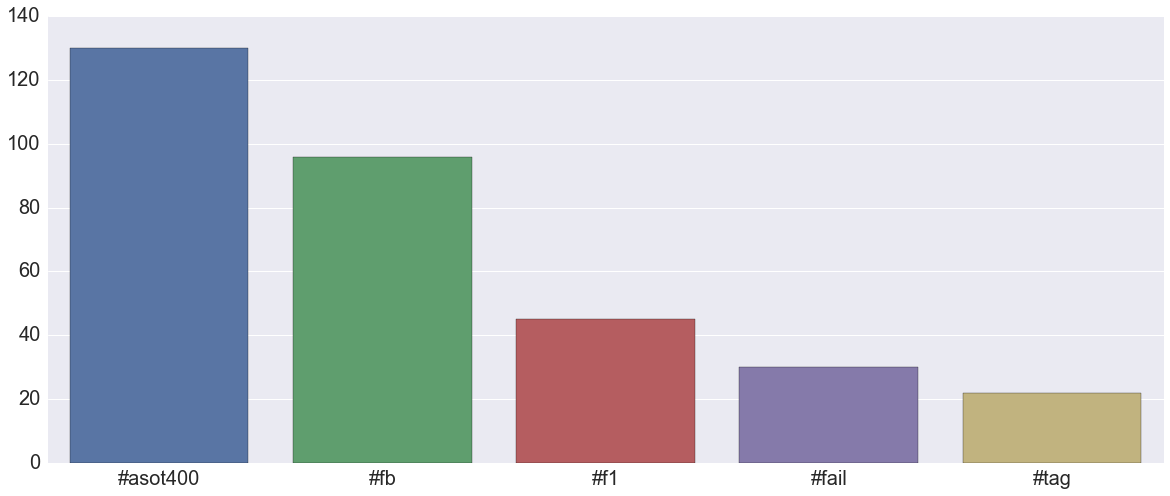

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


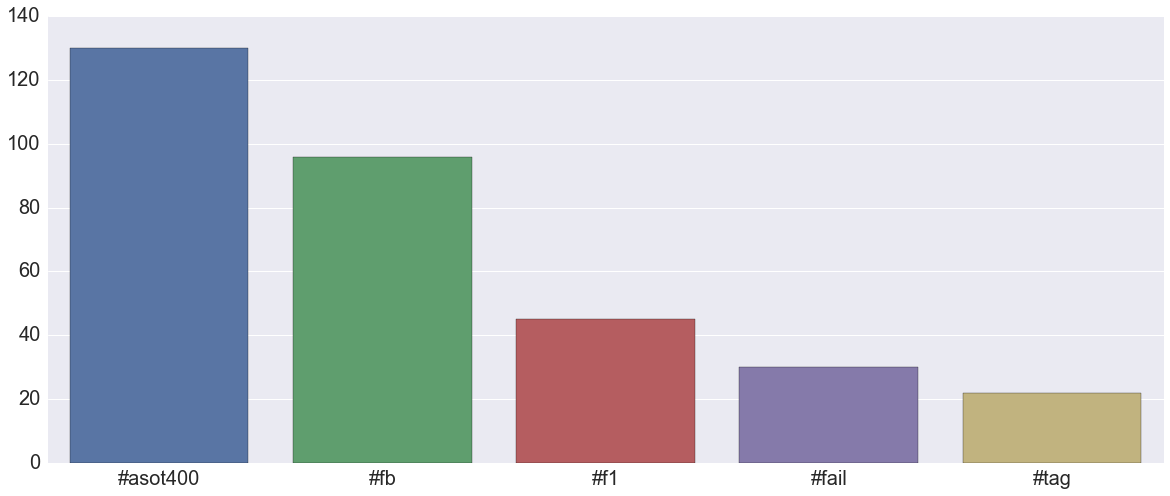

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


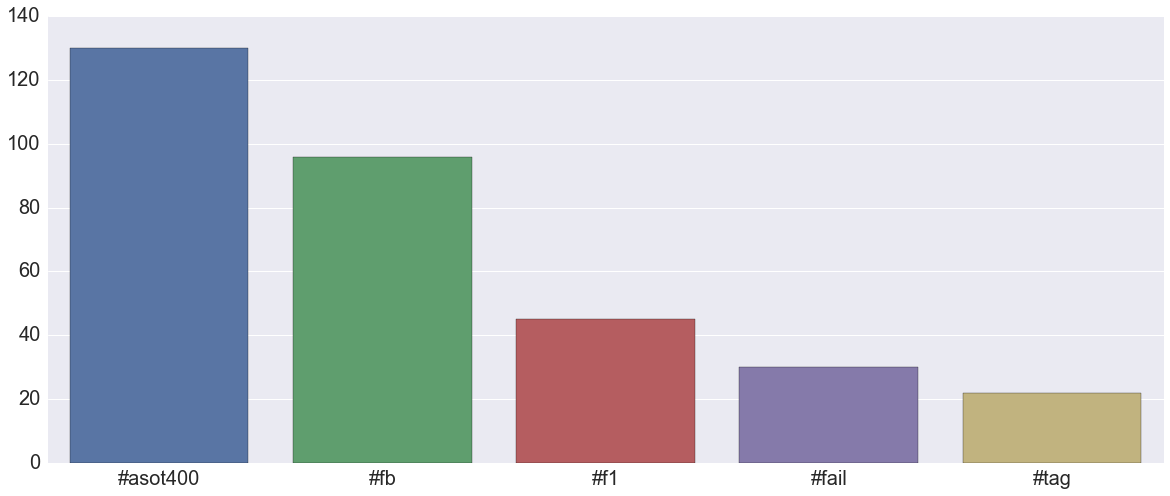

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


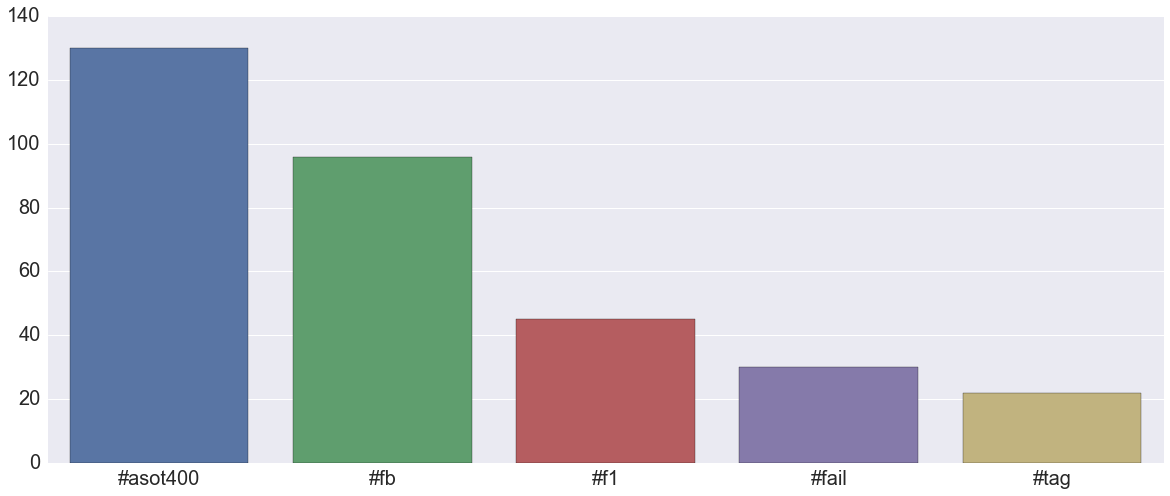

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


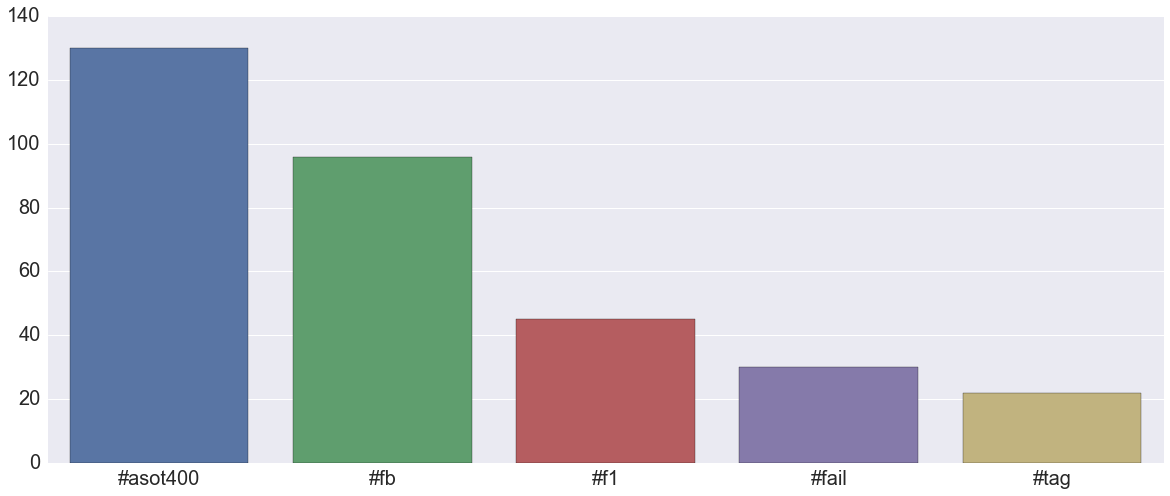

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


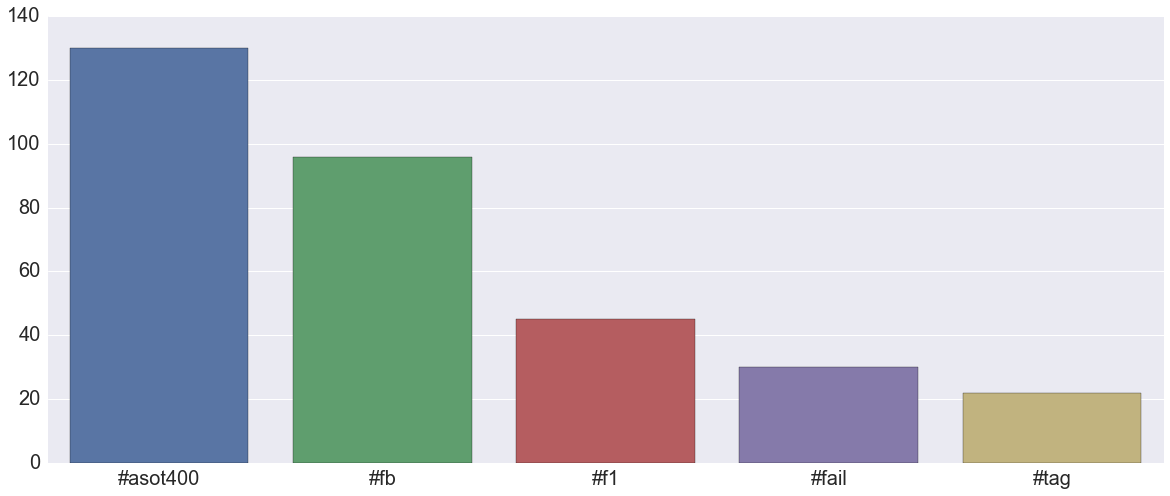

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


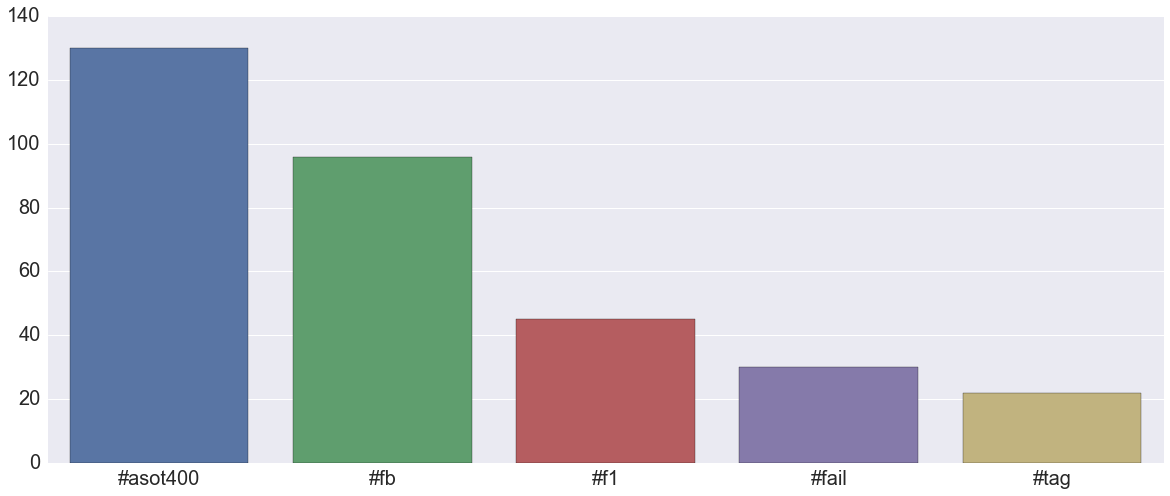

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


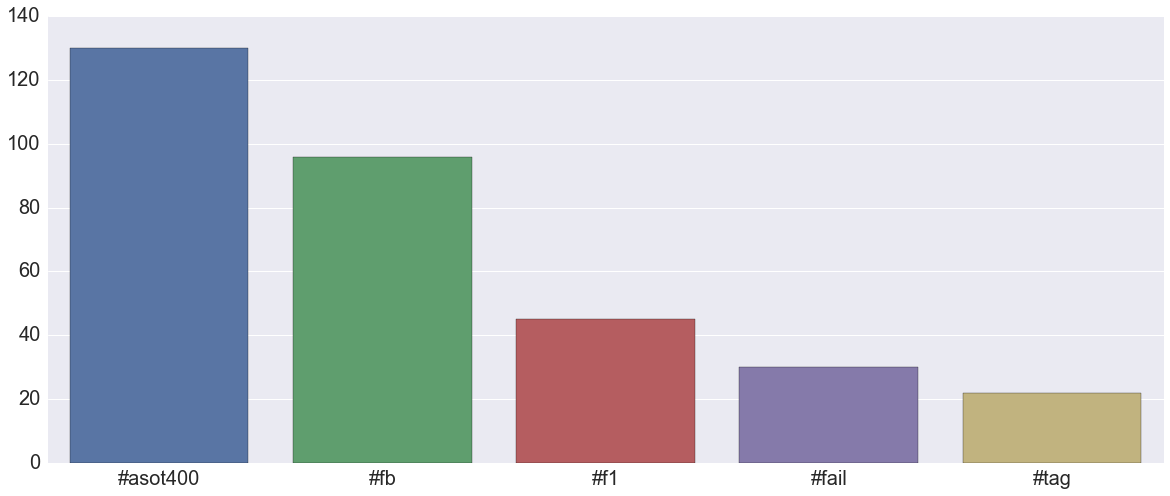

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


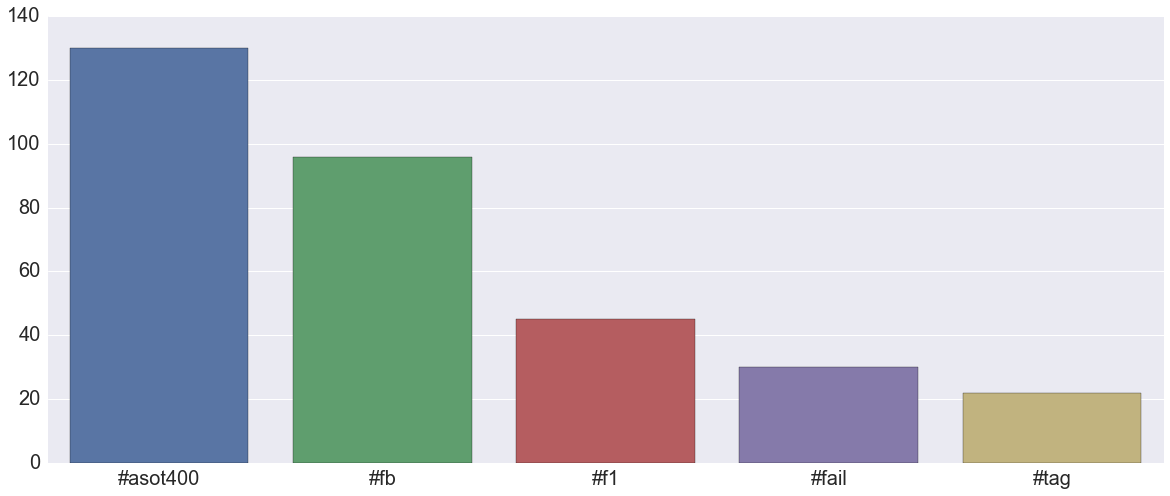

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


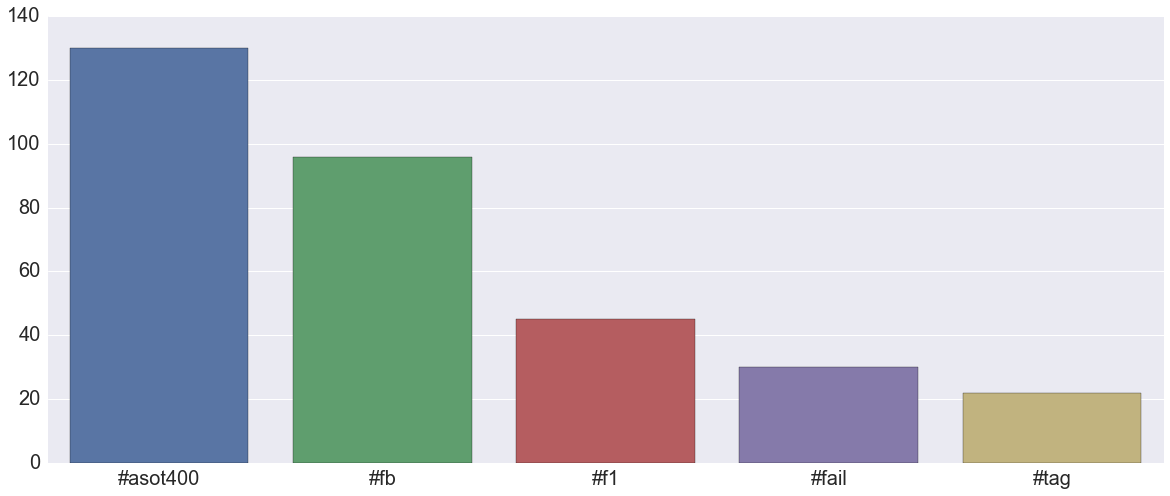

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


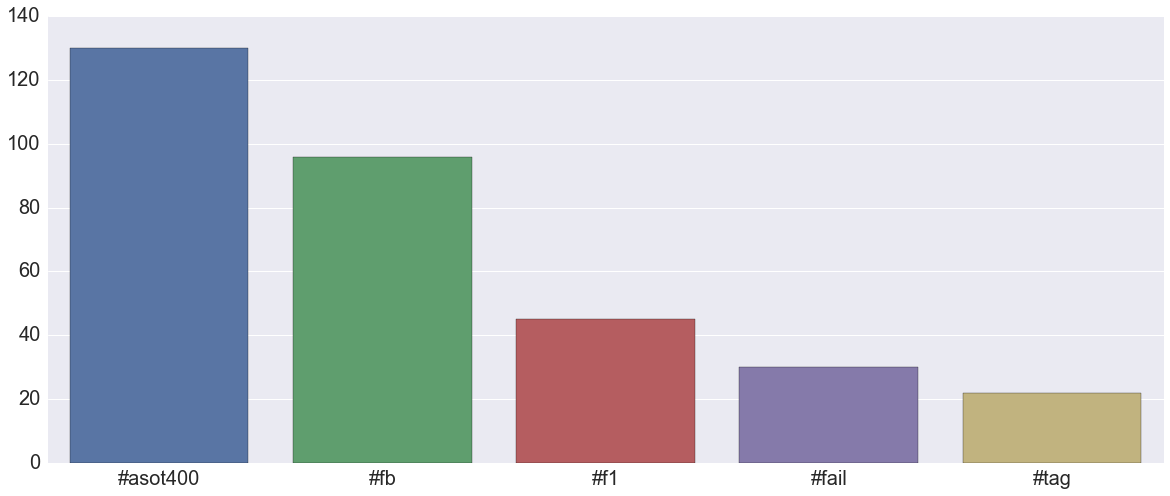

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


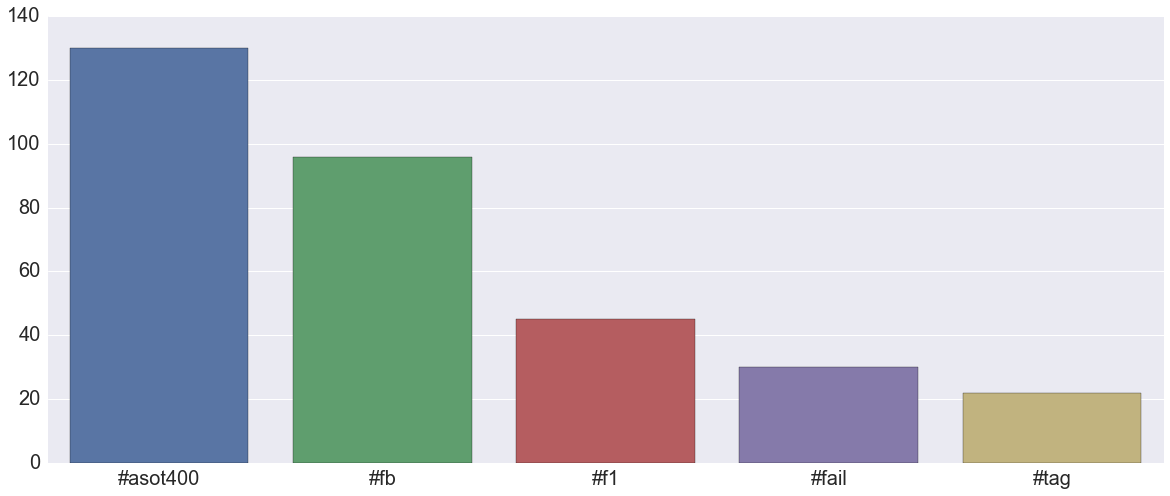

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


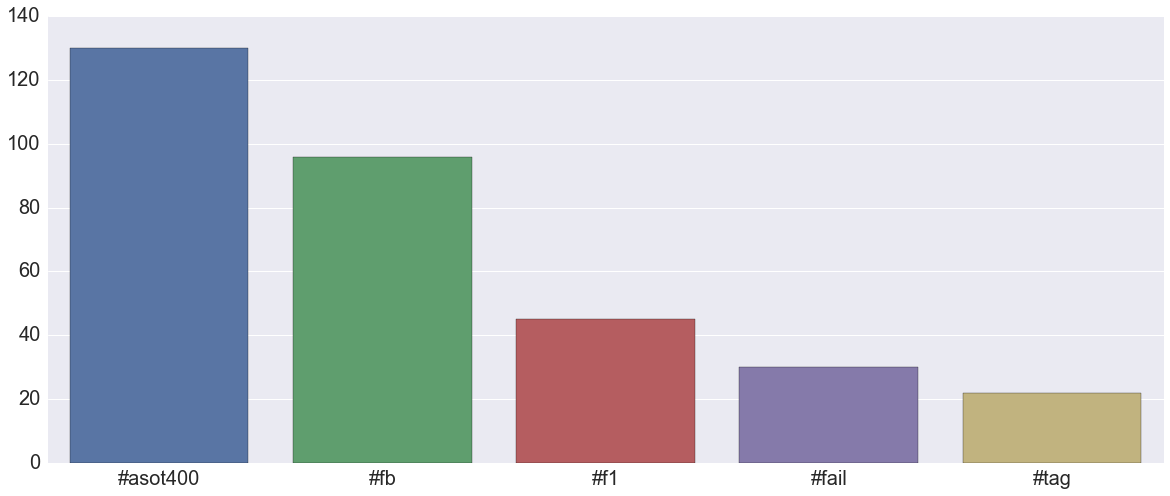

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


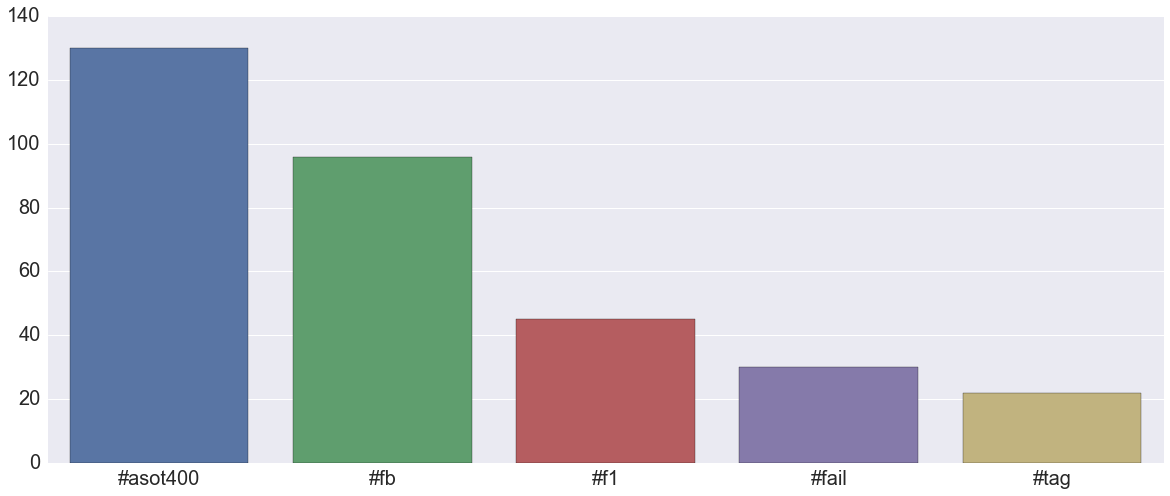

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


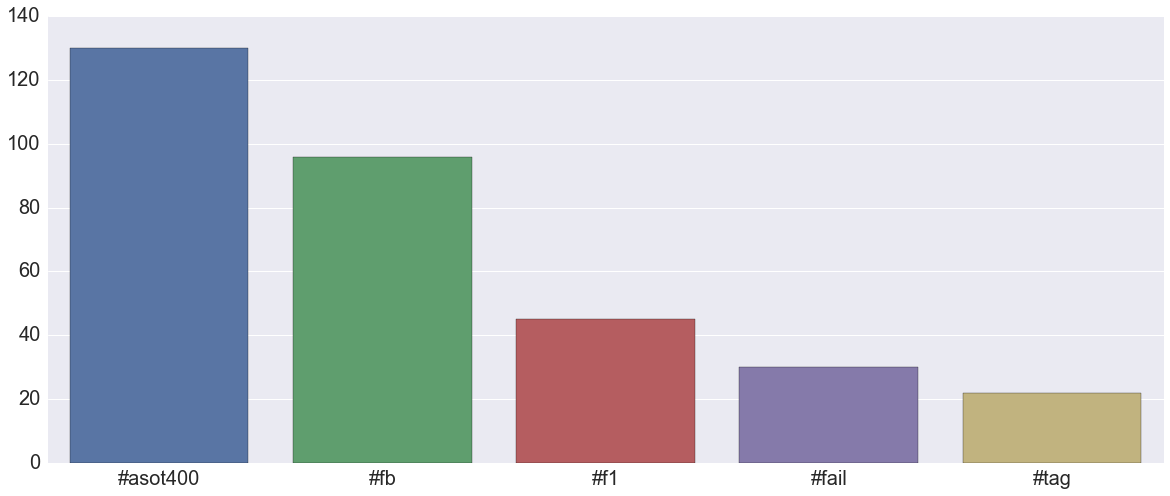

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


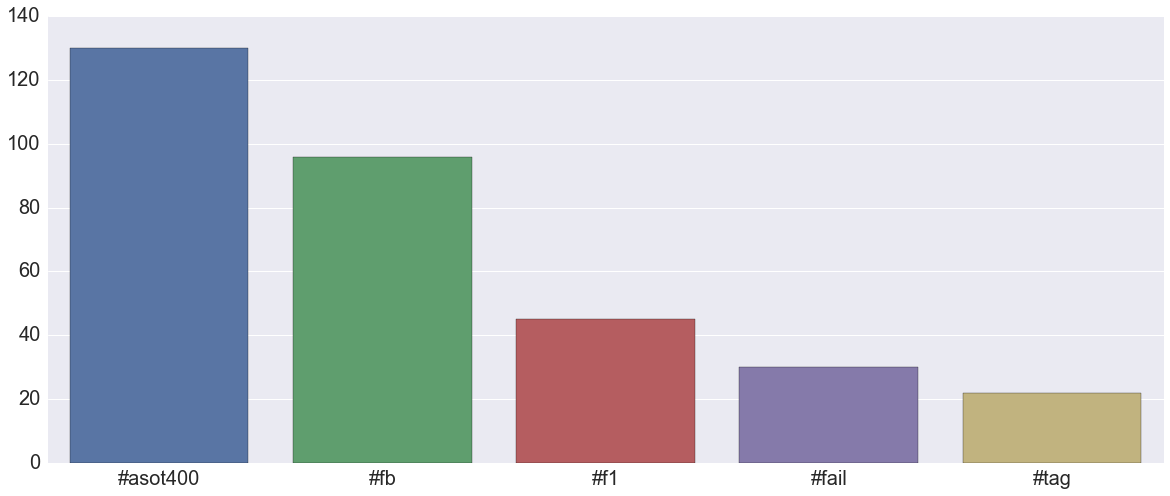

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


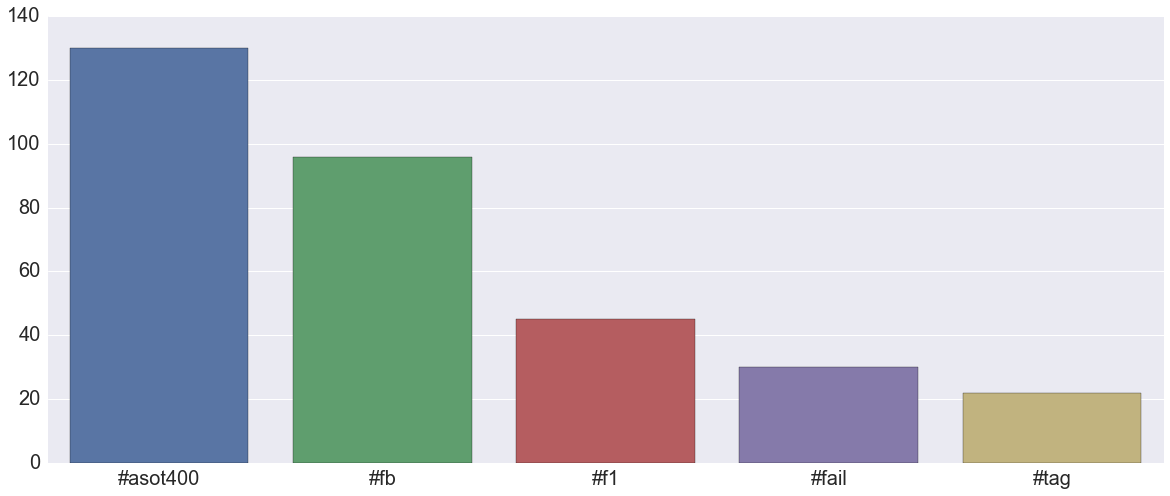

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


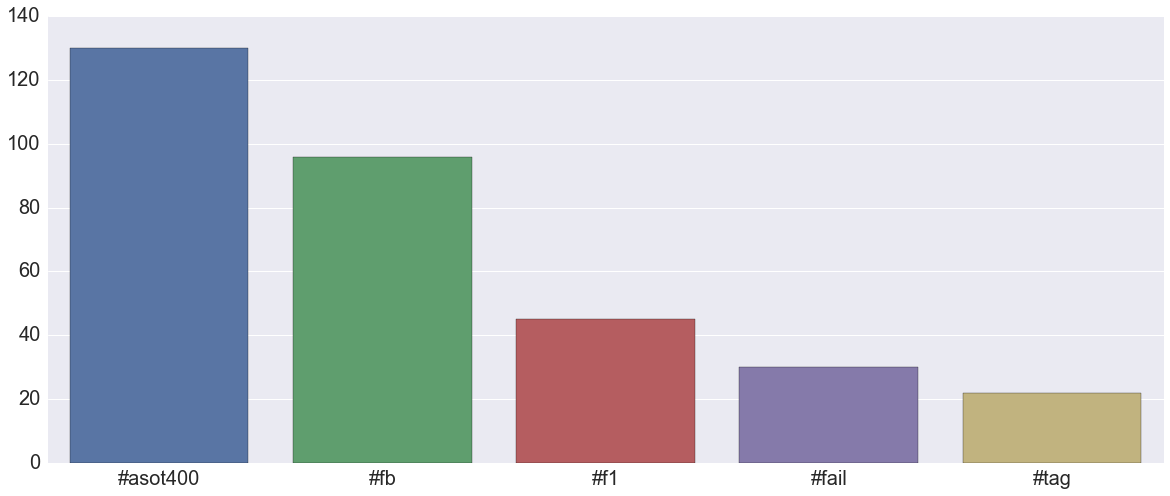

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


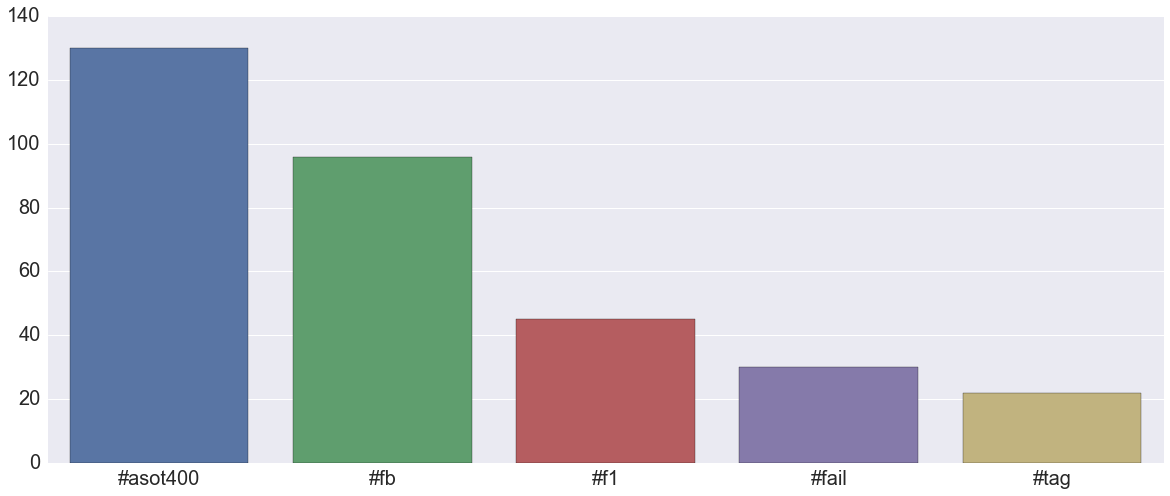

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


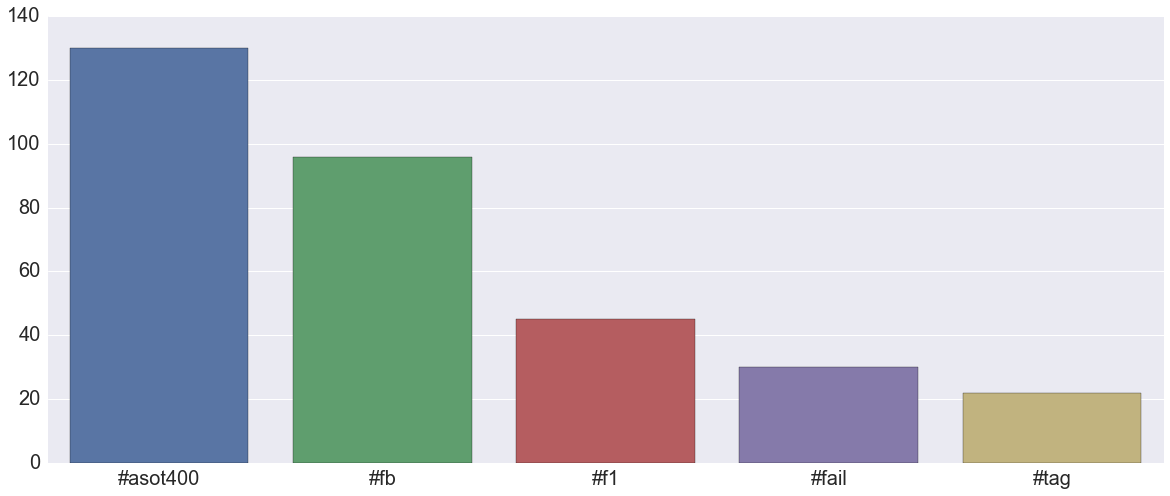

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


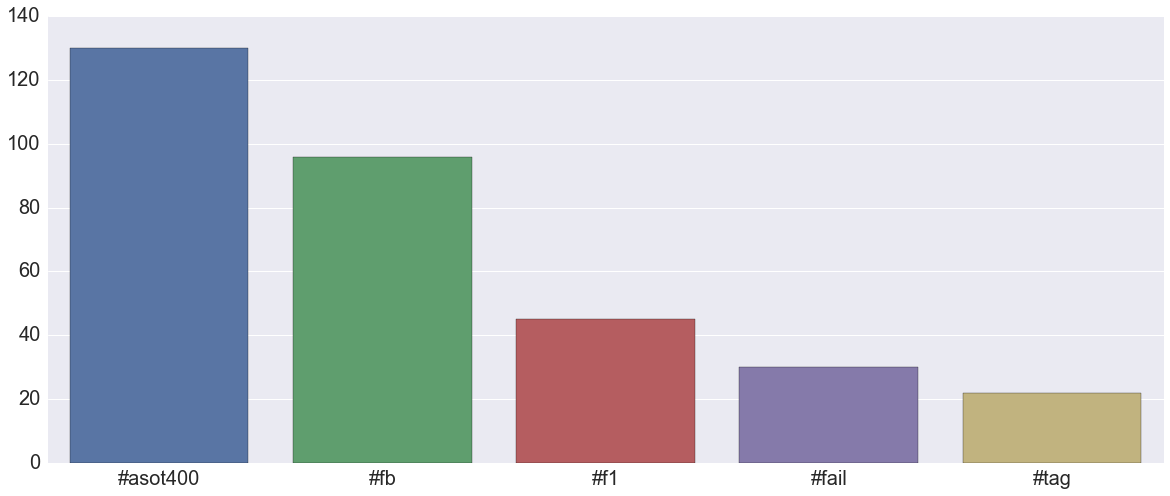

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


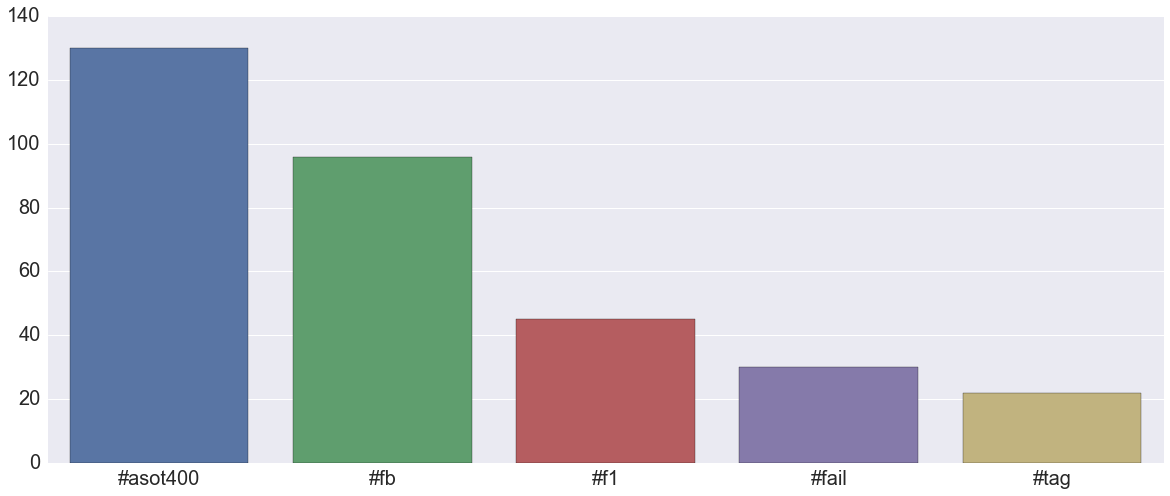

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


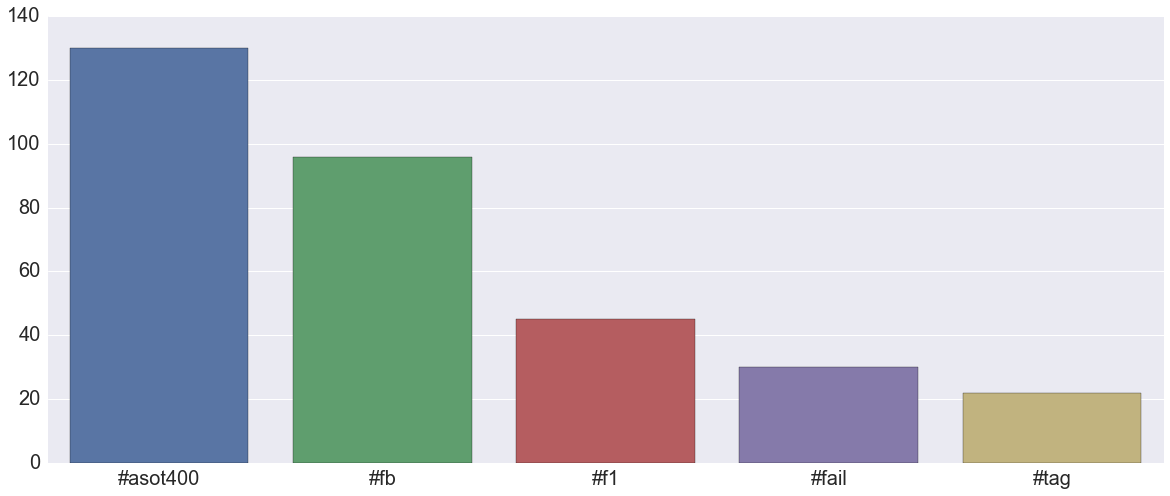

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


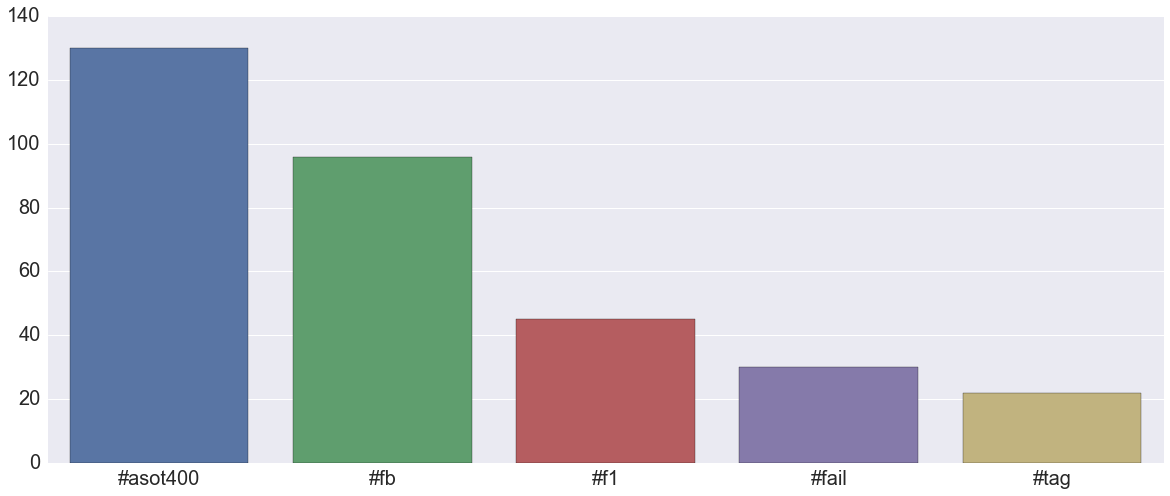

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


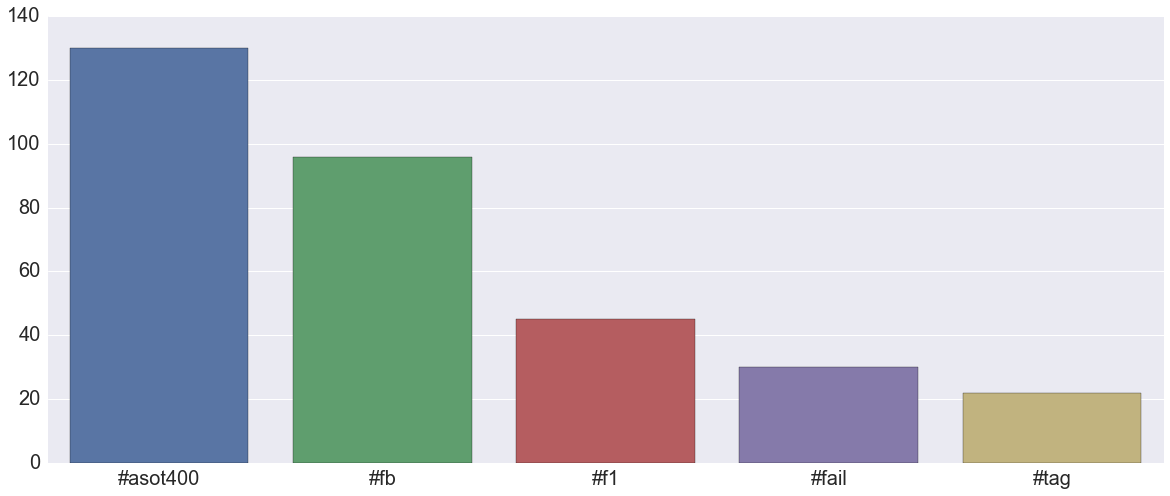

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


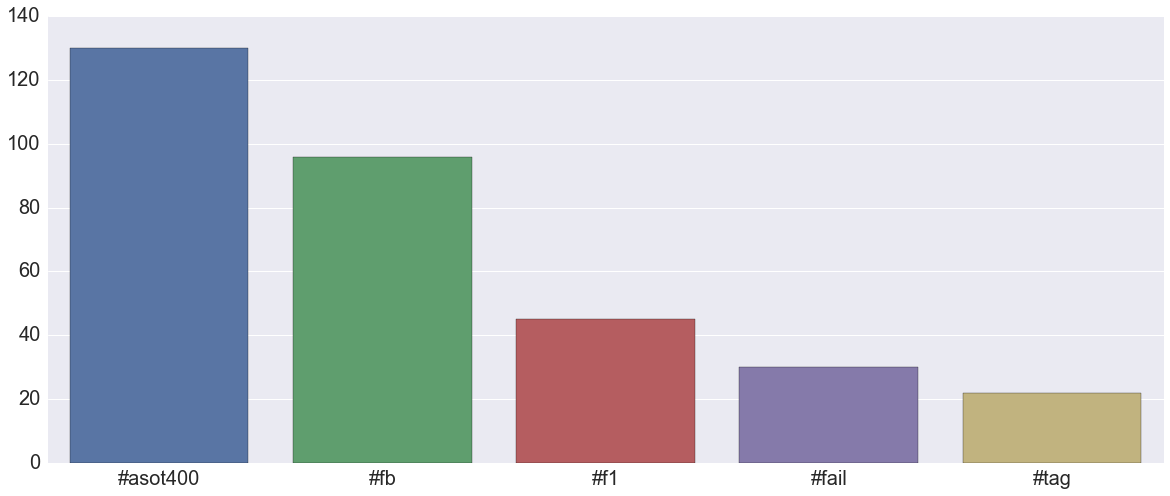

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


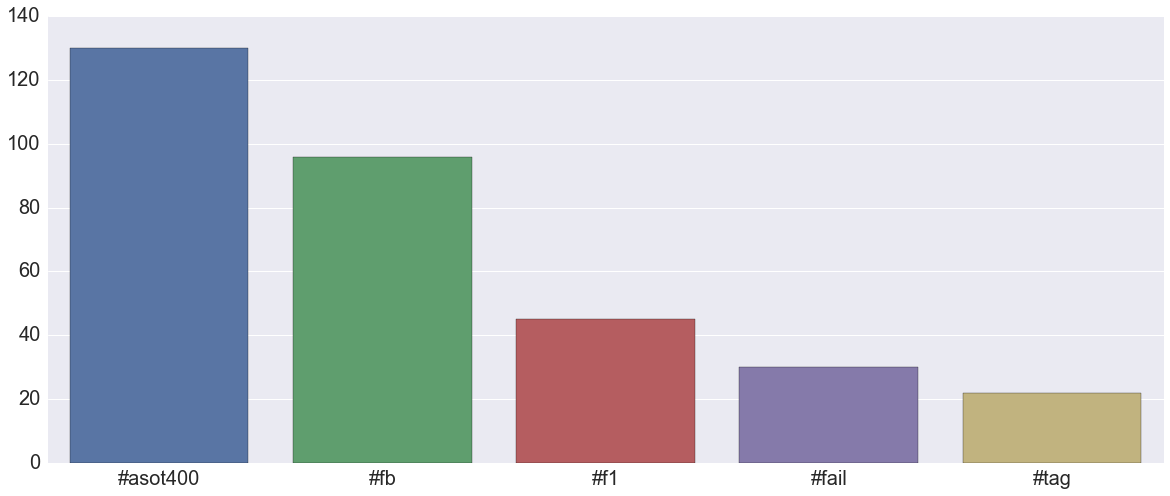

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


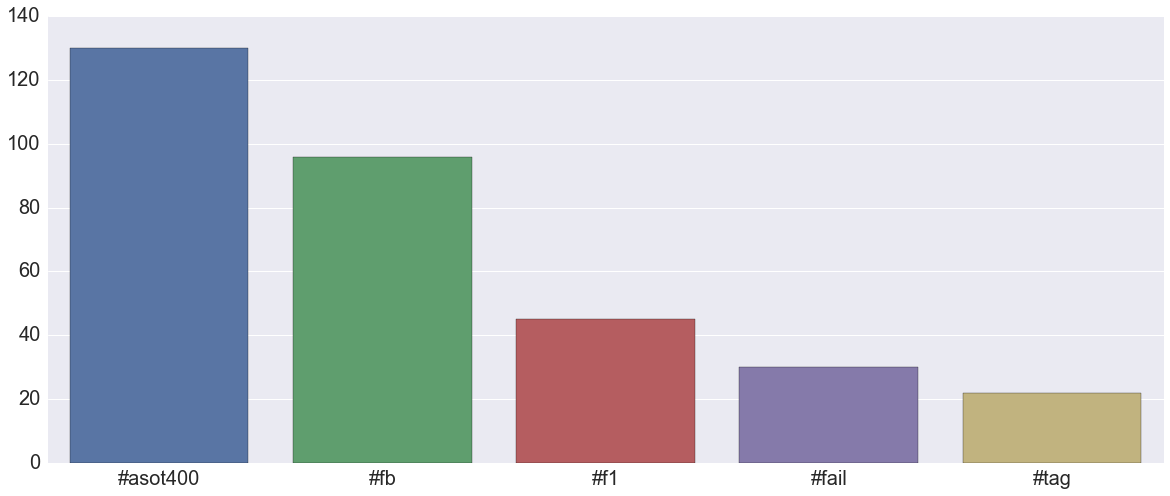

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


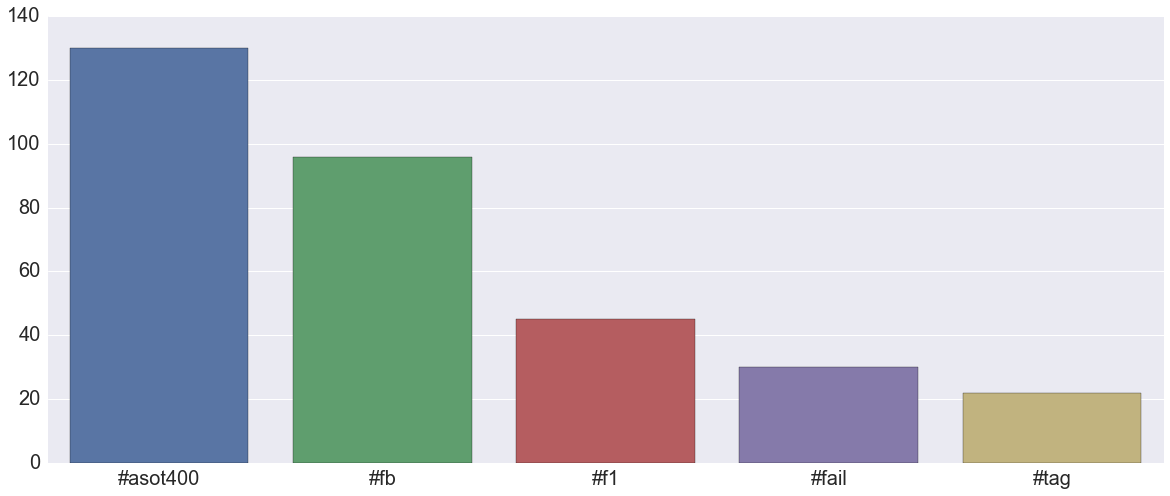

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


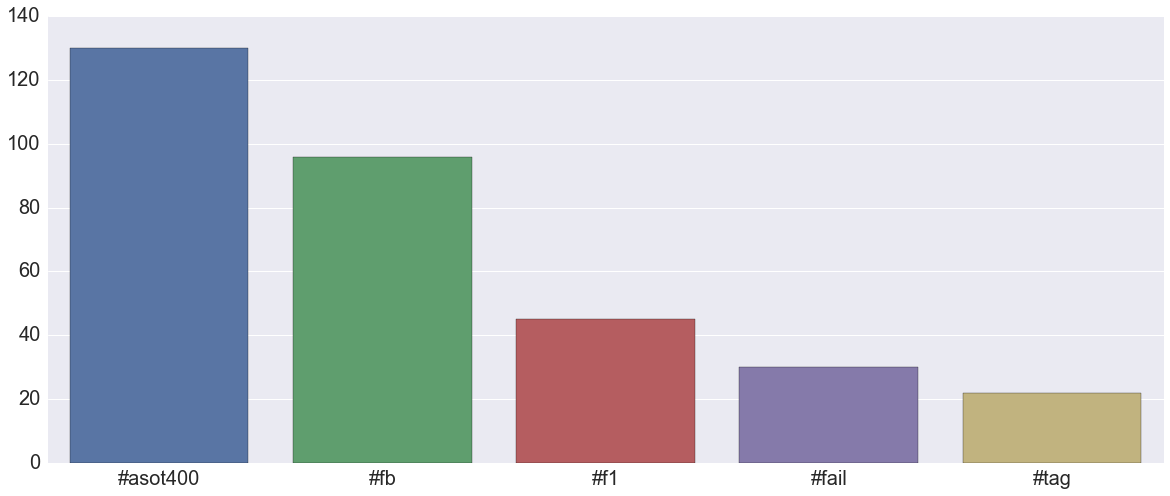

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


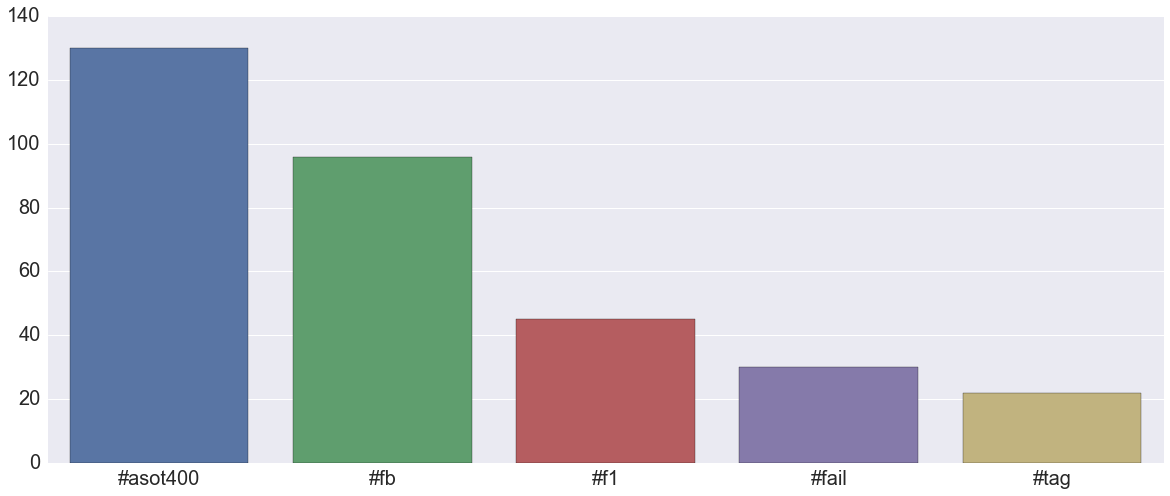

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


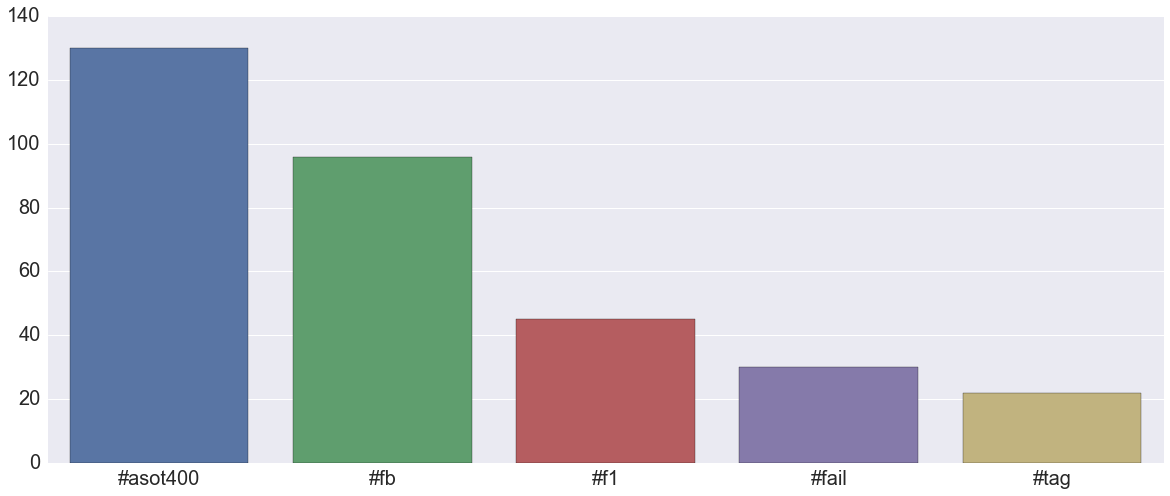

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


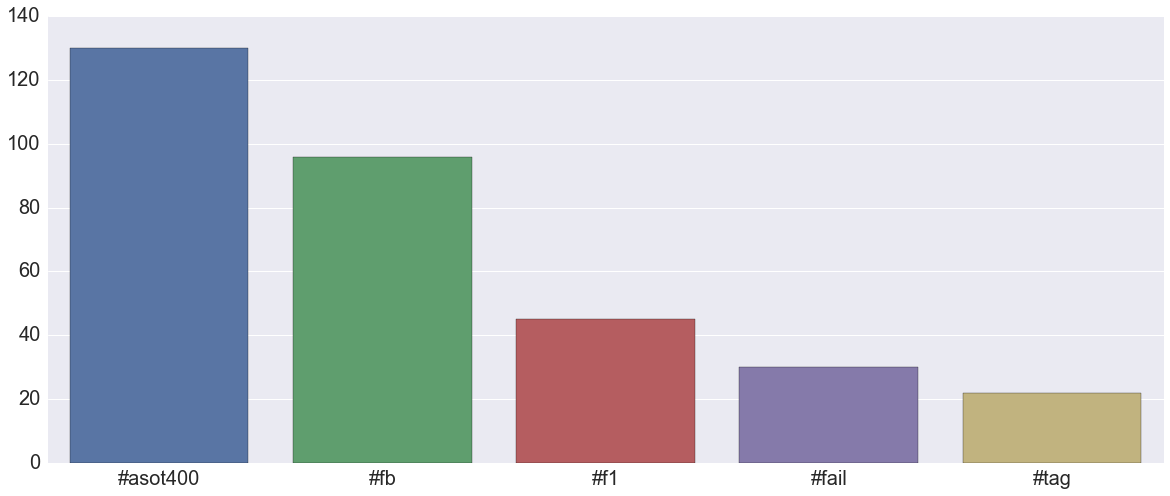

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


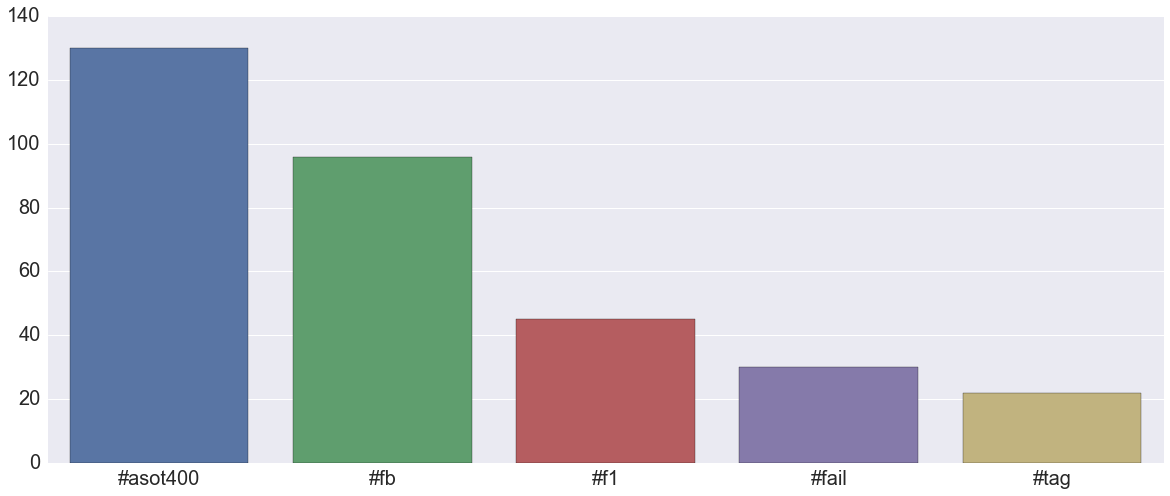

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


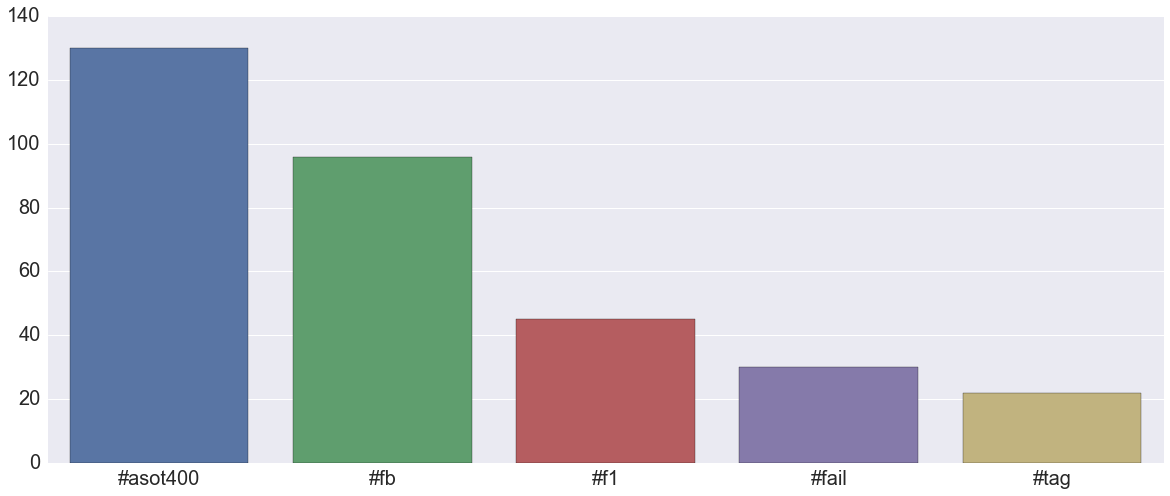

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


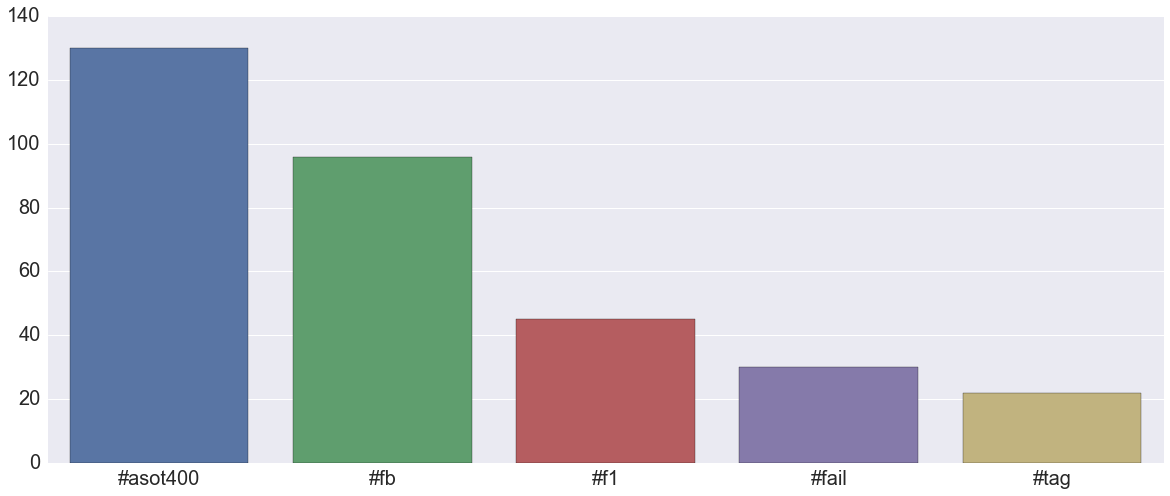

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


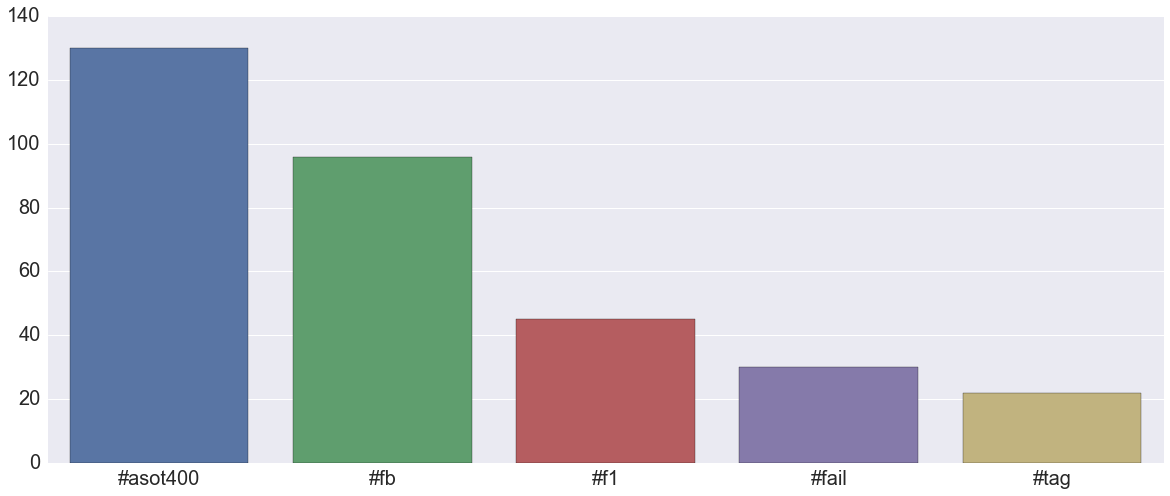

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


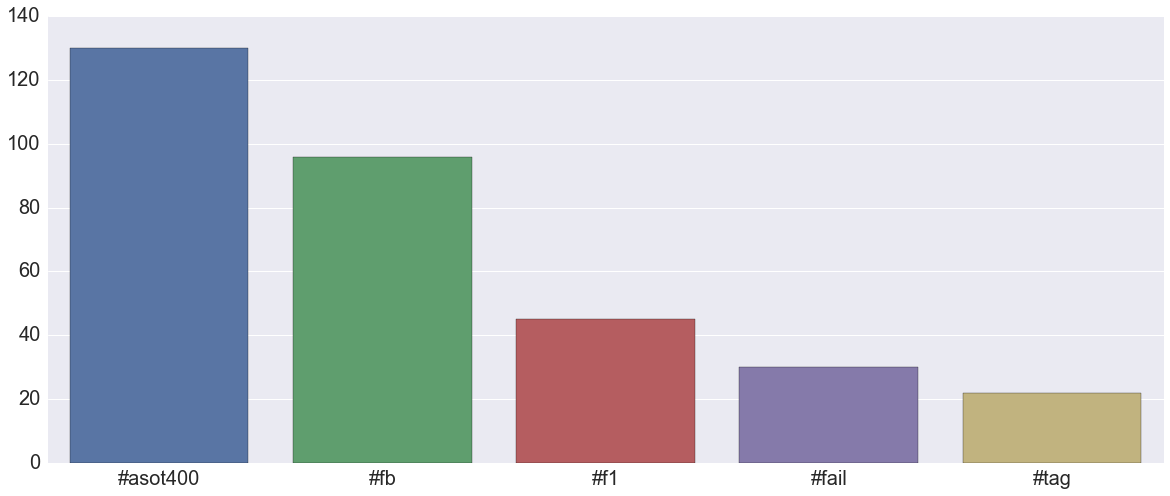

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


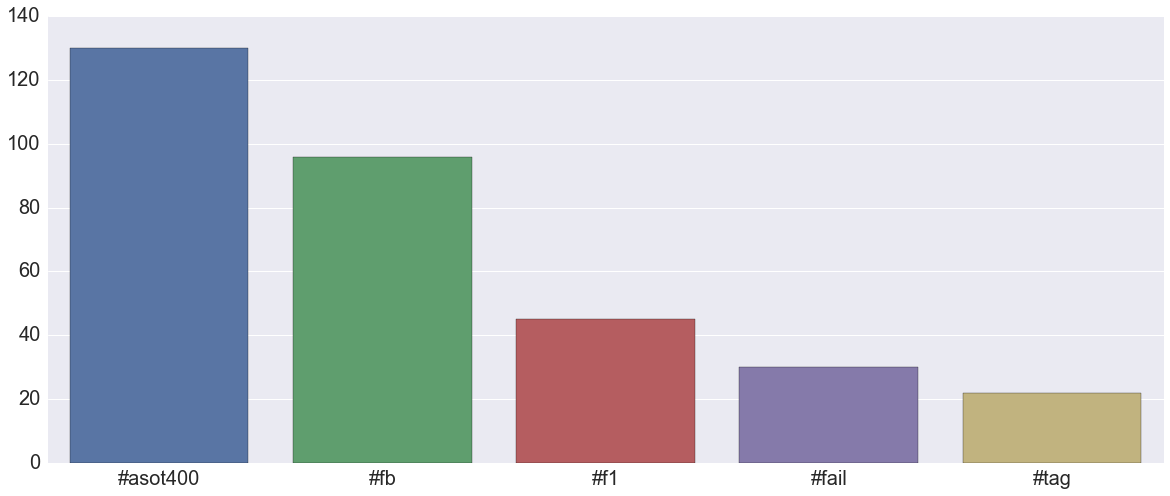

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


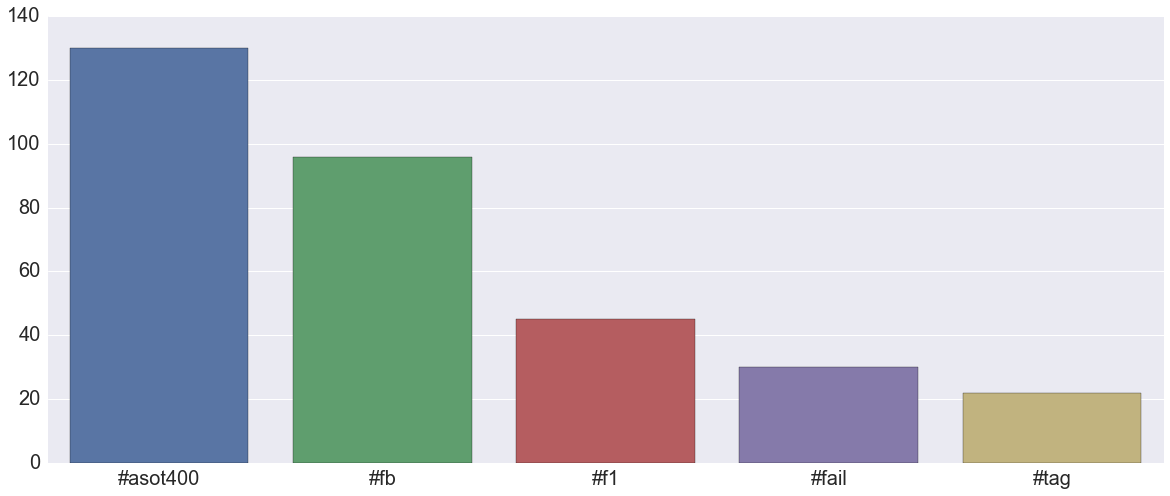

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


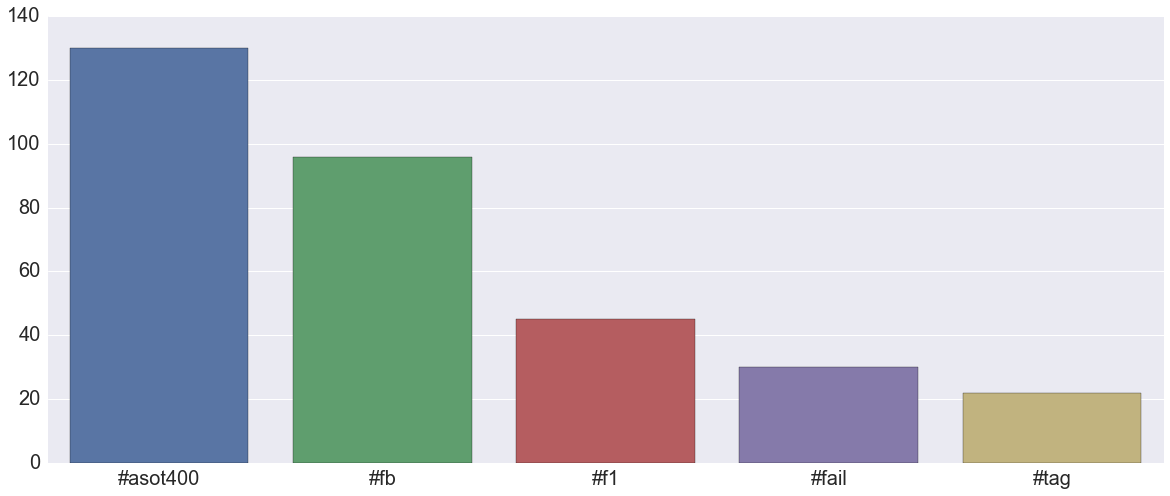

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


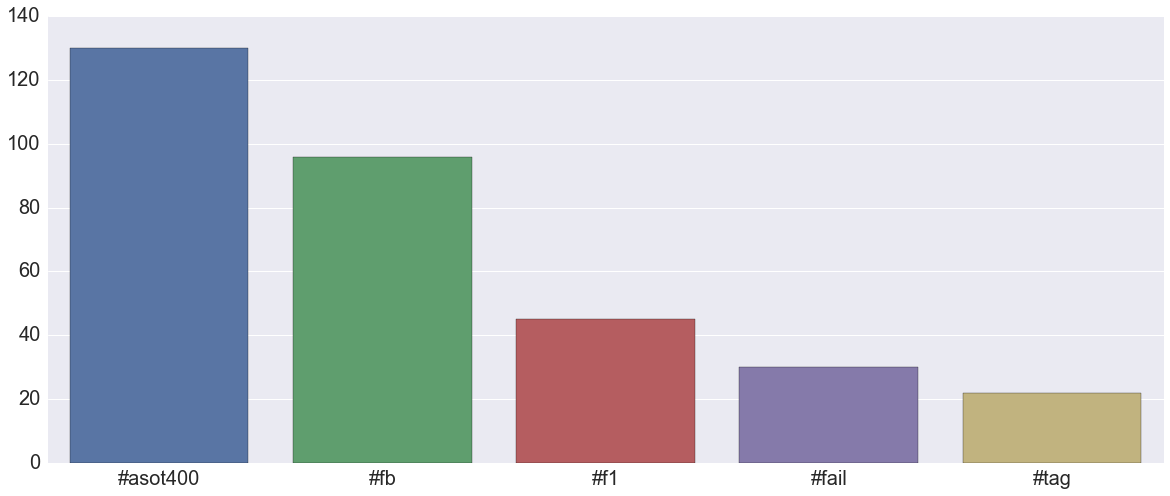

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


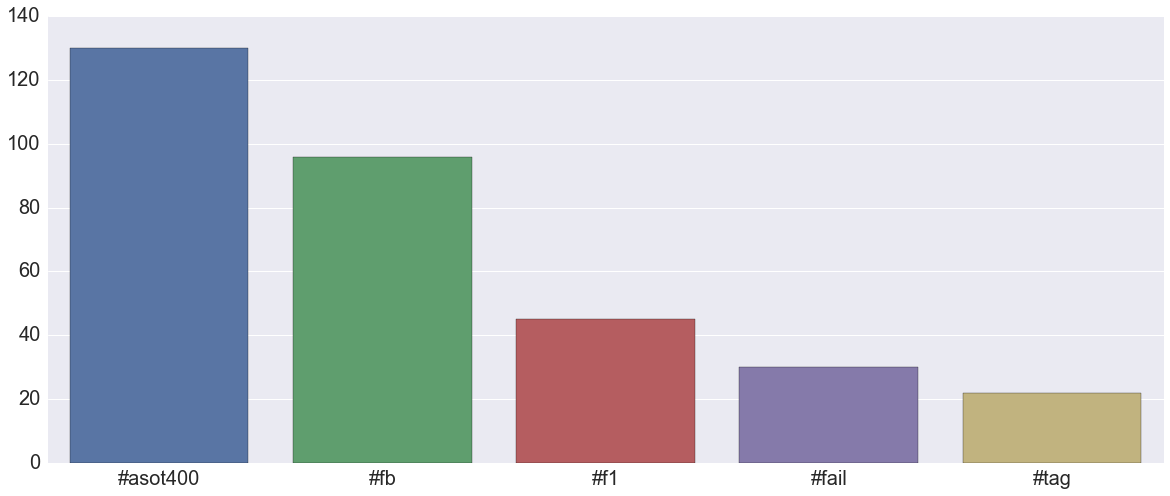

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


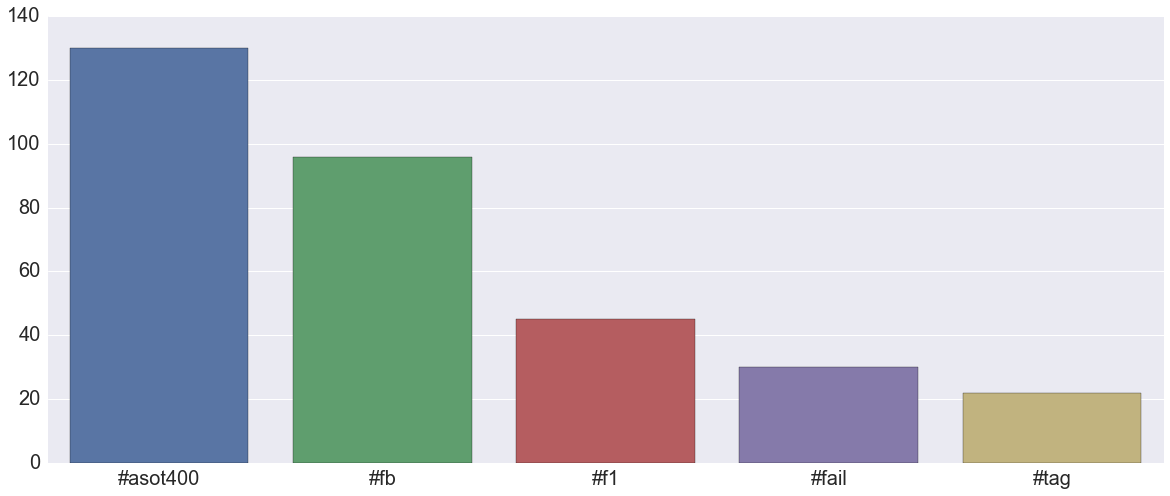

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


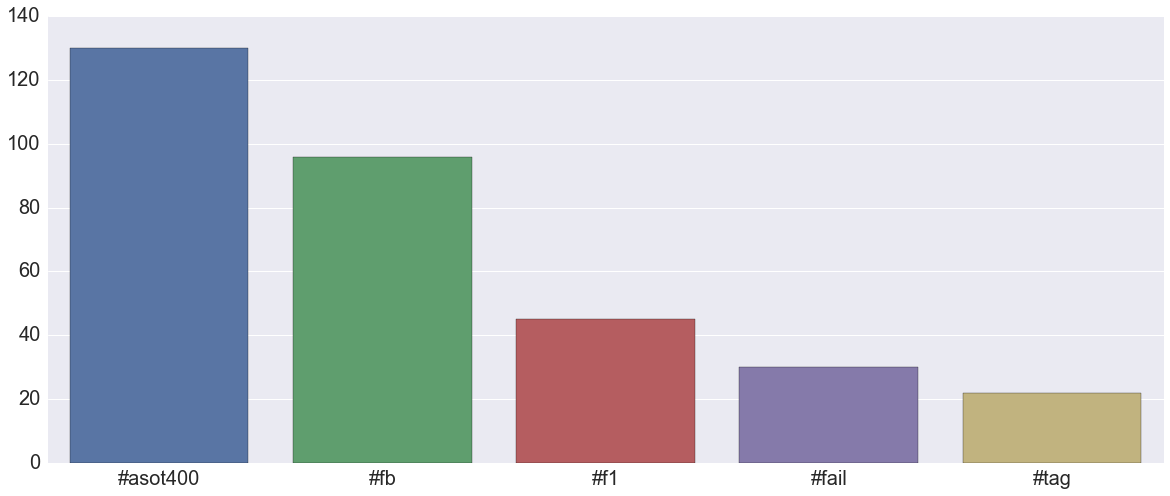

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


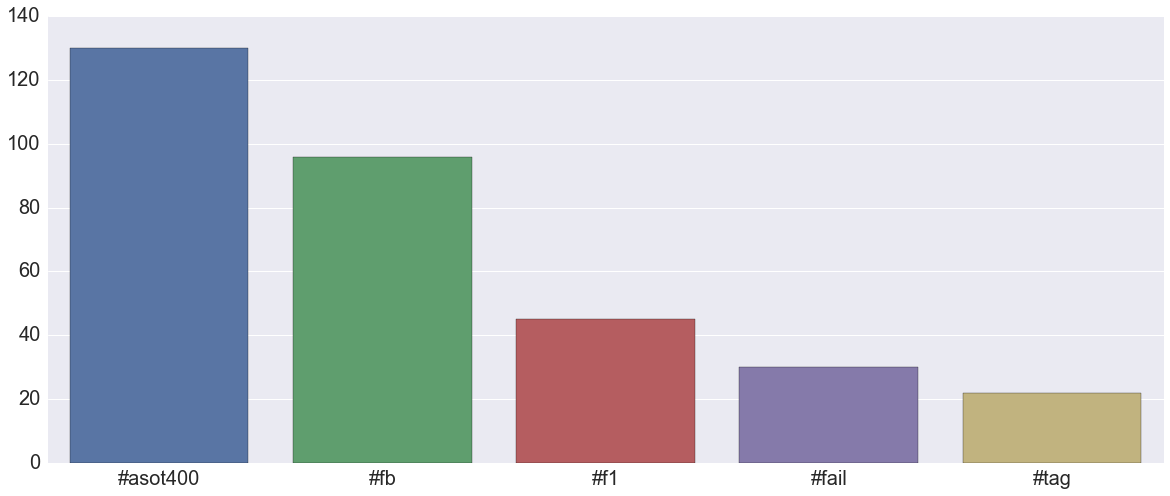

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


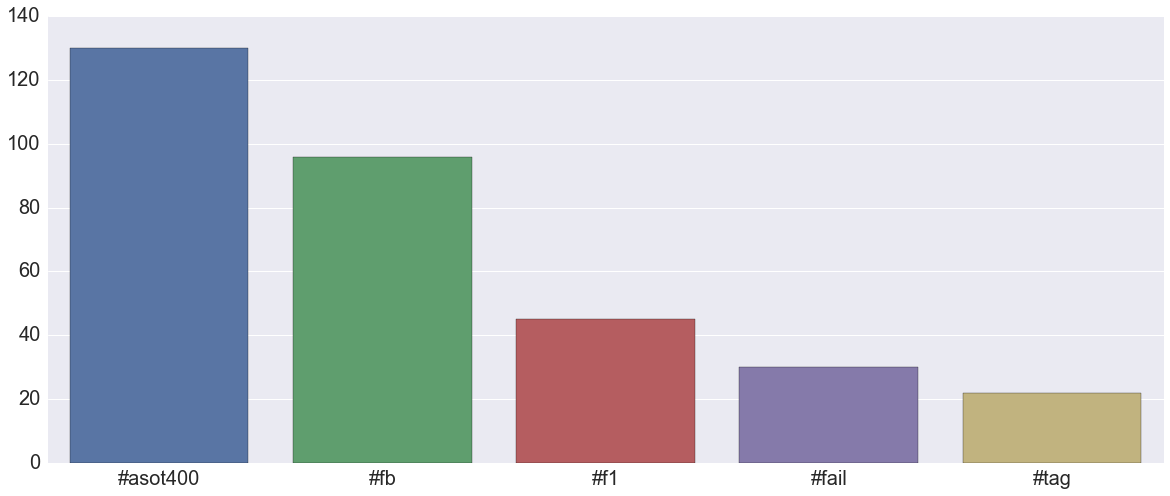

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


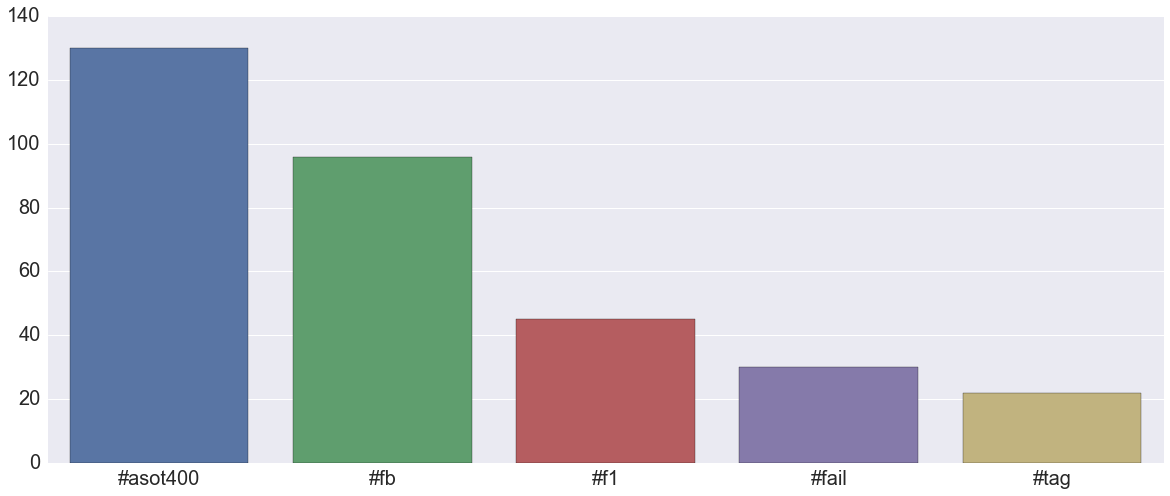

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


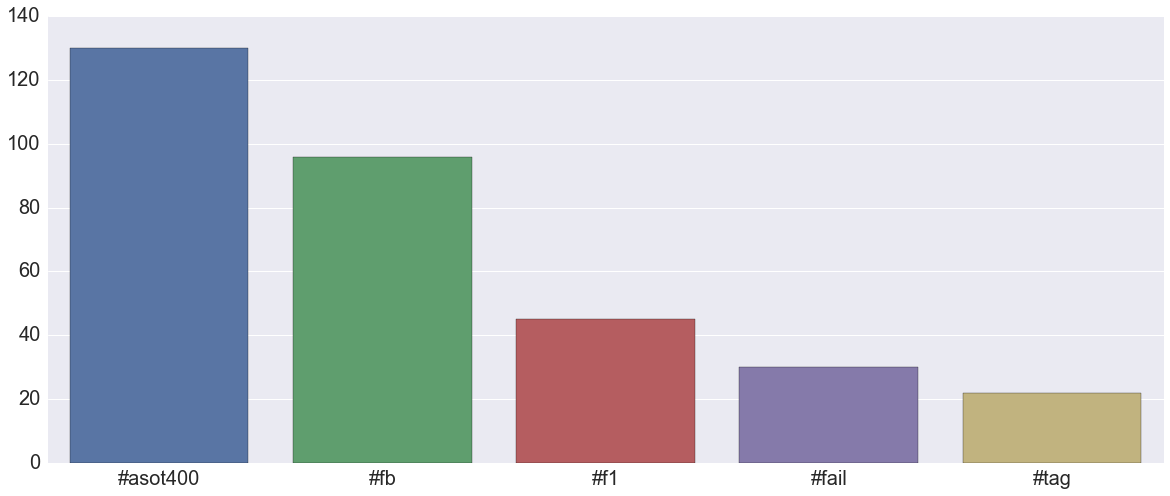

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


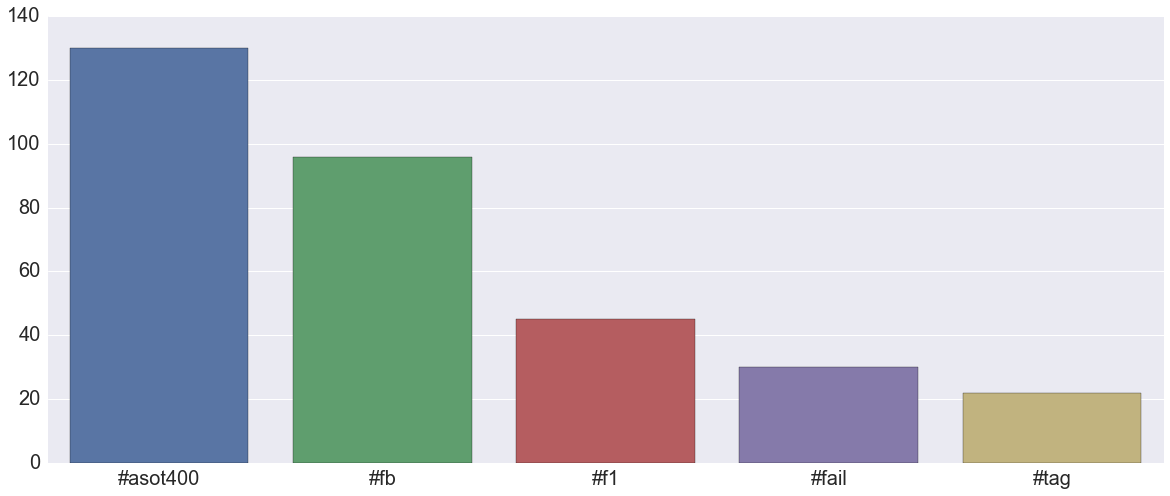

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


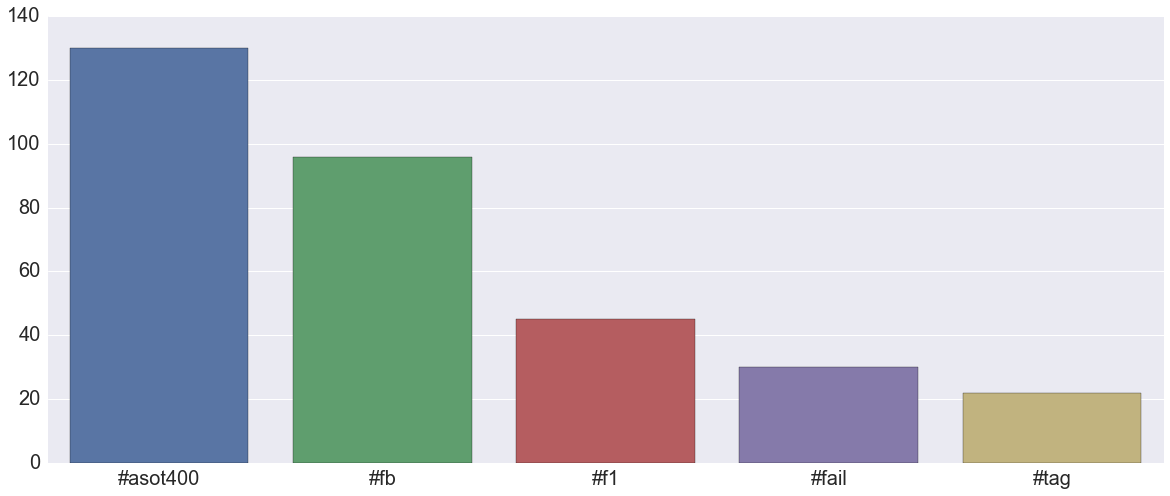

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


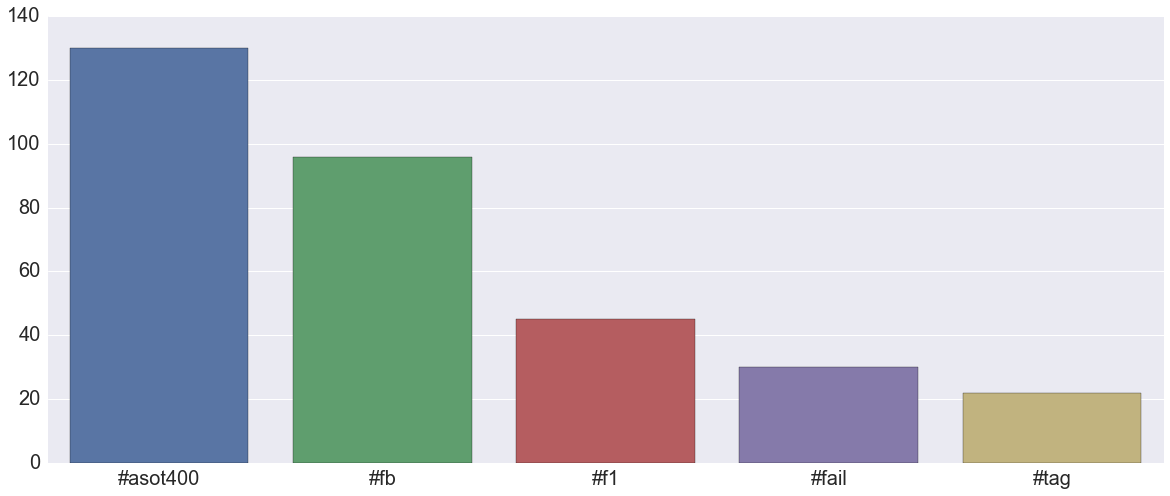

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


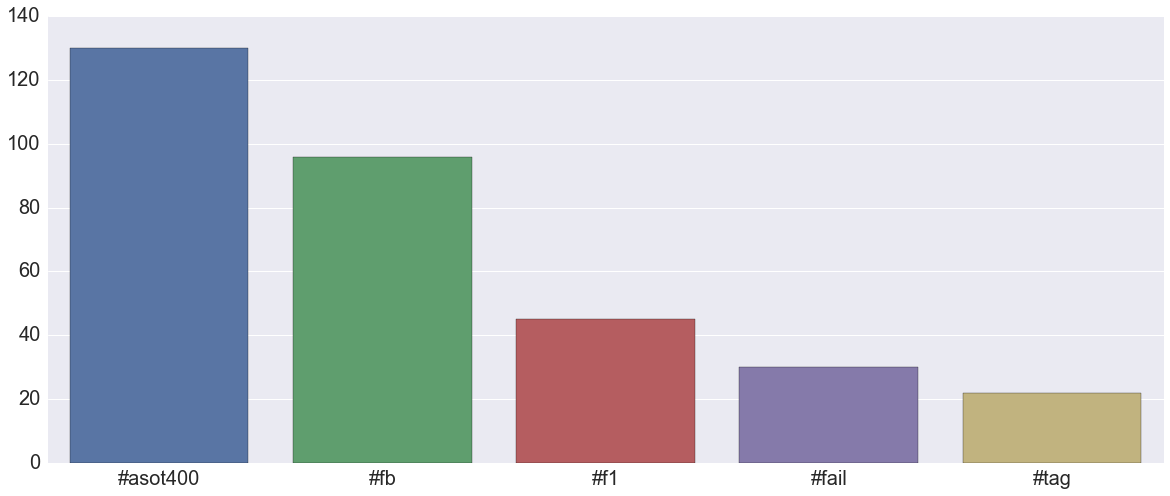

Latest Stats on Hash Tags:  [('#asot400', 130), ('#fb', 96), ('#f1', 45), ('#fail', 30), ('#tag', 22)]


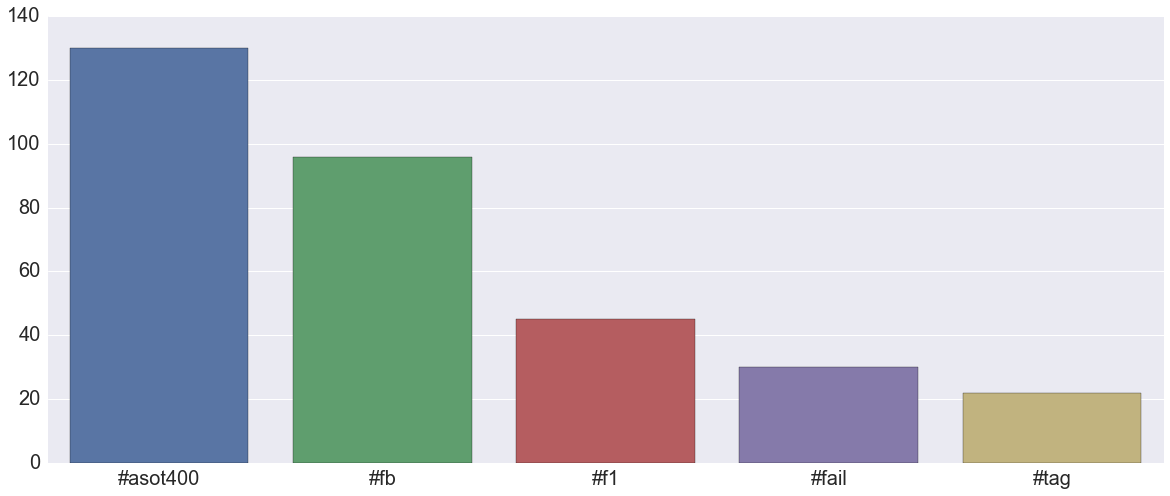

In [ ]:
sn.set(font_scale = 2, rc = {"font.size": 5})
while True:
    time.sleep(5)
    if len(counts) > 0 and len(counts[-1]) > 0: # make sure counts array is latest and non empty
        x = list(map(lambda pair: pair[0], counts[-1]))
        y = list(map(lambda pair: pair[1], counts[-1]))
        print('Latest Stats on Hash Tags: ', counts[-1])
        # display.clear_output(wait = True)
        sn.plt.figure(figsize = (20, 8))
        b = sn.barplot(x = x, y = y)
        sn.plt.show()